# Unsupervised Learning: Trade & Ahead

## Problem Statement

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
import time

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set pandas display options for better readability of output
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Set Seaborn aesthetic parameters
sns.set(
    context='notebook',
    style='darkgrid',
    #palette="Blues",
    font='sans-serif',
    font_scale=0.8,
    rc={'figure.figsize': (8, 5)}
)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

## Loading the dataset

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Complete the code to import the data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Unsupervised Learning/Project/stock_data.csv')

## Overview of the Dataset

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [ ]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.") ## Complete the code to get the shape of data

There are 340 rows and 15 columns.


### Displaying few rows of the dataset

In [ ]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.00000,-15.47808,2.92370,205,70,830000000,-14454000000,-35.55000,406582278.50000,93.08929,1.78562
125,FB,Facebook,Information Technology,Internet Software & Services,104.66000,16.22432,1.32061,8,958,592000000,3669000000,1.31000,2800763359.00000,79.89313,5.88447
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.03000,7.57861,1.16333,15,47,21818000,248710000,1.52000,163625000.00000,26.33553,-1.26933
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.41000,10.66054,0.80606,17,129,160383000,636056000,3.28000,491391569.00000,24.07012,-2.25675
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.61000,0.86529,1.58952,32,64,-588000000,-7829000000,-10.23000,765298142.70000,93.08929,3.34510
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.51618,-8.69892,1.47888,142,27,159000000,1293000000,2.97000,435353535.40000,17.68221,-3.83826
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.13000,-21.25377,2.36488,2,201,523803000,85171000,0.56000,152091071.40000,93.08929,9.56795
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.04000,-5.10175,1.96606,4,189,7786000000,-671000000,-0.79000,849367088.60000,93.08929,17.34586
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.62000,3.65358,1.15990,20,99,2288000000,2297000000,5.14000,446887159.50000,10.43191,-0.37593
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.48000,7.06748,1.58084,12,67,412000000,968100000,2.26000,428362831.90000,14.81416,4.21862


### Checking the data types of the columns for the dataset

In [ ]:
# checking the column names and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

### Creating a copy of original data

In [ ]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

### Checking for duplicates and missing values

In [ ]:
# checking for duplicate values
df.duplicated().sum() ## Complete the code to get total number of duplicate values

0

In [ ]:
# checking for missing values in the data
df.isna().sum() ## Complete the code to check the missing values in the data

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

### Statistical summary of the dataset

**Let's check the statistical summary of the data.**

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.00000,NaN,NaN,NaN,80.86234,98.05509,4.50000,38.55500,59.70500,92.88000,1274.94995
Price Change,340.00000,NaN,NaN,NaN,4.07819,12.00634,-47.12969,-0.93948,4.81950,10.69549,55.05168
Volatility,340.00000,NaN,NaN,NaN,1.52598,0.59180,0.73316,1.13488,1.38559,1.69555,4.58004
ROE,340.00000,NaN,NaN,NaN,39.59706,96.54754,1.00000,9.75000,15.00000,27.00000,917.00000
Cash Ratio,340.00000,NaN,NaN,NaN,70.02353,90.42133,0.00000,18.00000,47.00000,99.00000,958.00000
Net Cash Flow,340.00000,NaN,NaN,NaN,55537620.58824,1946365312.17579,-11208000000.00000,-193906500.00000,2098000.00000,169810750.00000,20764000000.00000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.00000,80.86234,98.05509,4.50000,38.55500,59.70500,92.88000,1274.94995
Price Change,340.00000,4.07819,12.00634,-47.12969,-0.93948,4.81950,10.69549,55.05168
Volatility,340.00000,1.52598,0.59180,0.73316,1.13488,1.38559,1.69555,4.58004
ROE,340.00000,39.59706,96.54754,1.00000,9.75000,15.00000,27.00000,917.00000
Cash Ratio,340.00000,70.02353,90.42133,0.00000,18.00000,47.00000,99.00000,958.00000
Net Cash Flow,340.00000,55537620.58824,1946365312.17579,-11208000000.00000,-193906500.00000,2098000.00000,169810750.00000,20764000000.00000
Net Income,340.00000,1494384602.94118,3940150279.32794,-23528000000.00000,352301250.00000,707336000.00000,1899000000.00000,24442000000.00000
Earnings Per Share,340.00000,2.77666,6.58778,-61.20000,1.55750,2.89500,4.62000,50.09000
Estimated Shares Outstanding,340.00000,577028337.75403,845849595.41769,27672156.86000,158848216.10000,309675137.80000,573117457.32500,6159292035.00000
P/E Ratio,340.00000,32.61256,44.34873,2.93545,15.04465,20.81988,31.76476,528.03907


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Ticker Symbol,340,340,AAL,1
Security,340,340,American Airlines Group,1
GICS Sector,340,11,Industrials,53
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16


## Exploratory Data Analysis

In [ ]:
# Displays a boxplot and a histogram along the same scale.
def histogram_boxplot_grid(data):
    """
    Grid of boxplots and histograms for each feature in the dataset.
    data: training dataset
    """

    features = data.columns  # Exclude the target column

    ncols = 4
    nplots = len(features) * 2 # Each feature needs two plots
    nrows = nplots // ncols + (nplots % ncols > 0)  # Calculate rows based on total plots needed

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5 * (nrows // 2)), gridspec_kw={'height_ratios': [1, 3] * (nrows // 2)})

    for i, feature in enumerate(features):
        row, col = divmod(i, ncols)
        ax_box = axes[row * 2, col]
        ax_hist = axes[row * 2 + 1, col]

        # Plot the boxplot and histogram
        sns.boxplot(data=data, x=feature, ax=ax_box, showmeans=True, palette="coolwarm")
        sns.histplot(data=data, x=feature, kde=False, ax=ax_hist, palette="winter")

        # Add mean and median lines to the histogram
        ax_hist.axvline(data[feature].mean(), color="green", linestyle="--")
        ax_hist.axvline(data[feature].median(), color="black", linestyle="-")

        # Hide the x-axis labels for the boxplot
        ax_box.set_xlabel('')
        ax_box.set_xticks([])

    # Adjust the layout and remove empty subplots
    plt.tight_layout()
    for ax in axes.flat:
        if not ax.get_children():  # Check if the subplot is empty
            fig.delaxes(ax)  # Remove the empty subplot

# Displays a heatmap of significant correlation between features.
def significant_correlations(dataframe, annot=True, threshold=0.5):
    """
    dataframe: pandas DataFrame
    annot: display correlation value True or False
    threshold: minimum absolute value of correlation coefficient to be considered significant (default 0.5)
    """
    # Calculate the correlation matrix
    corr_matrix = dataframe.corr()

    # Filter out correlations below the threshold and the diagonal (self-correlations)
    significant_corr = corr_matrix[abs(corr_matrix) >= threshold]
    significant_corr = significant_corr[significant_corr != 1]

    # Plot the heatmap
    plt.figure(figsize=(20, 12))
    sns.heatmap(significant_corr, annot=annot, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
    plt.title('Significant Correlations between Features')
    plt.show()

# Prints a table for each variable with significantly high correlation with other variables.
def print_significant_correlations(dataframe, threshold=0.5):
    """
    dataframe: pandas DataFrame
    threshold: minimum absolute value of correlation coefficient to be considered significant (default 0.5)
    """
    # Calculate the correlation matrix
    corr_matrix = dataframe.corr()

    # Iterate through each variable and print the significant correlations
    for variable in corr_matrix.columns:
        significant_corrs = corr_matrix[(abs(corr_matrix[variable]) >= threshold) & (corr_matrix[variable] != 1)][variable]
        if not significant_corrs.empty:
            print(f"Variable '{variable}' has significant correlations with:")
            print(significant_corrs.to_string(), '\n')

### Univariate analysis

In [ ]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`Current Price`**

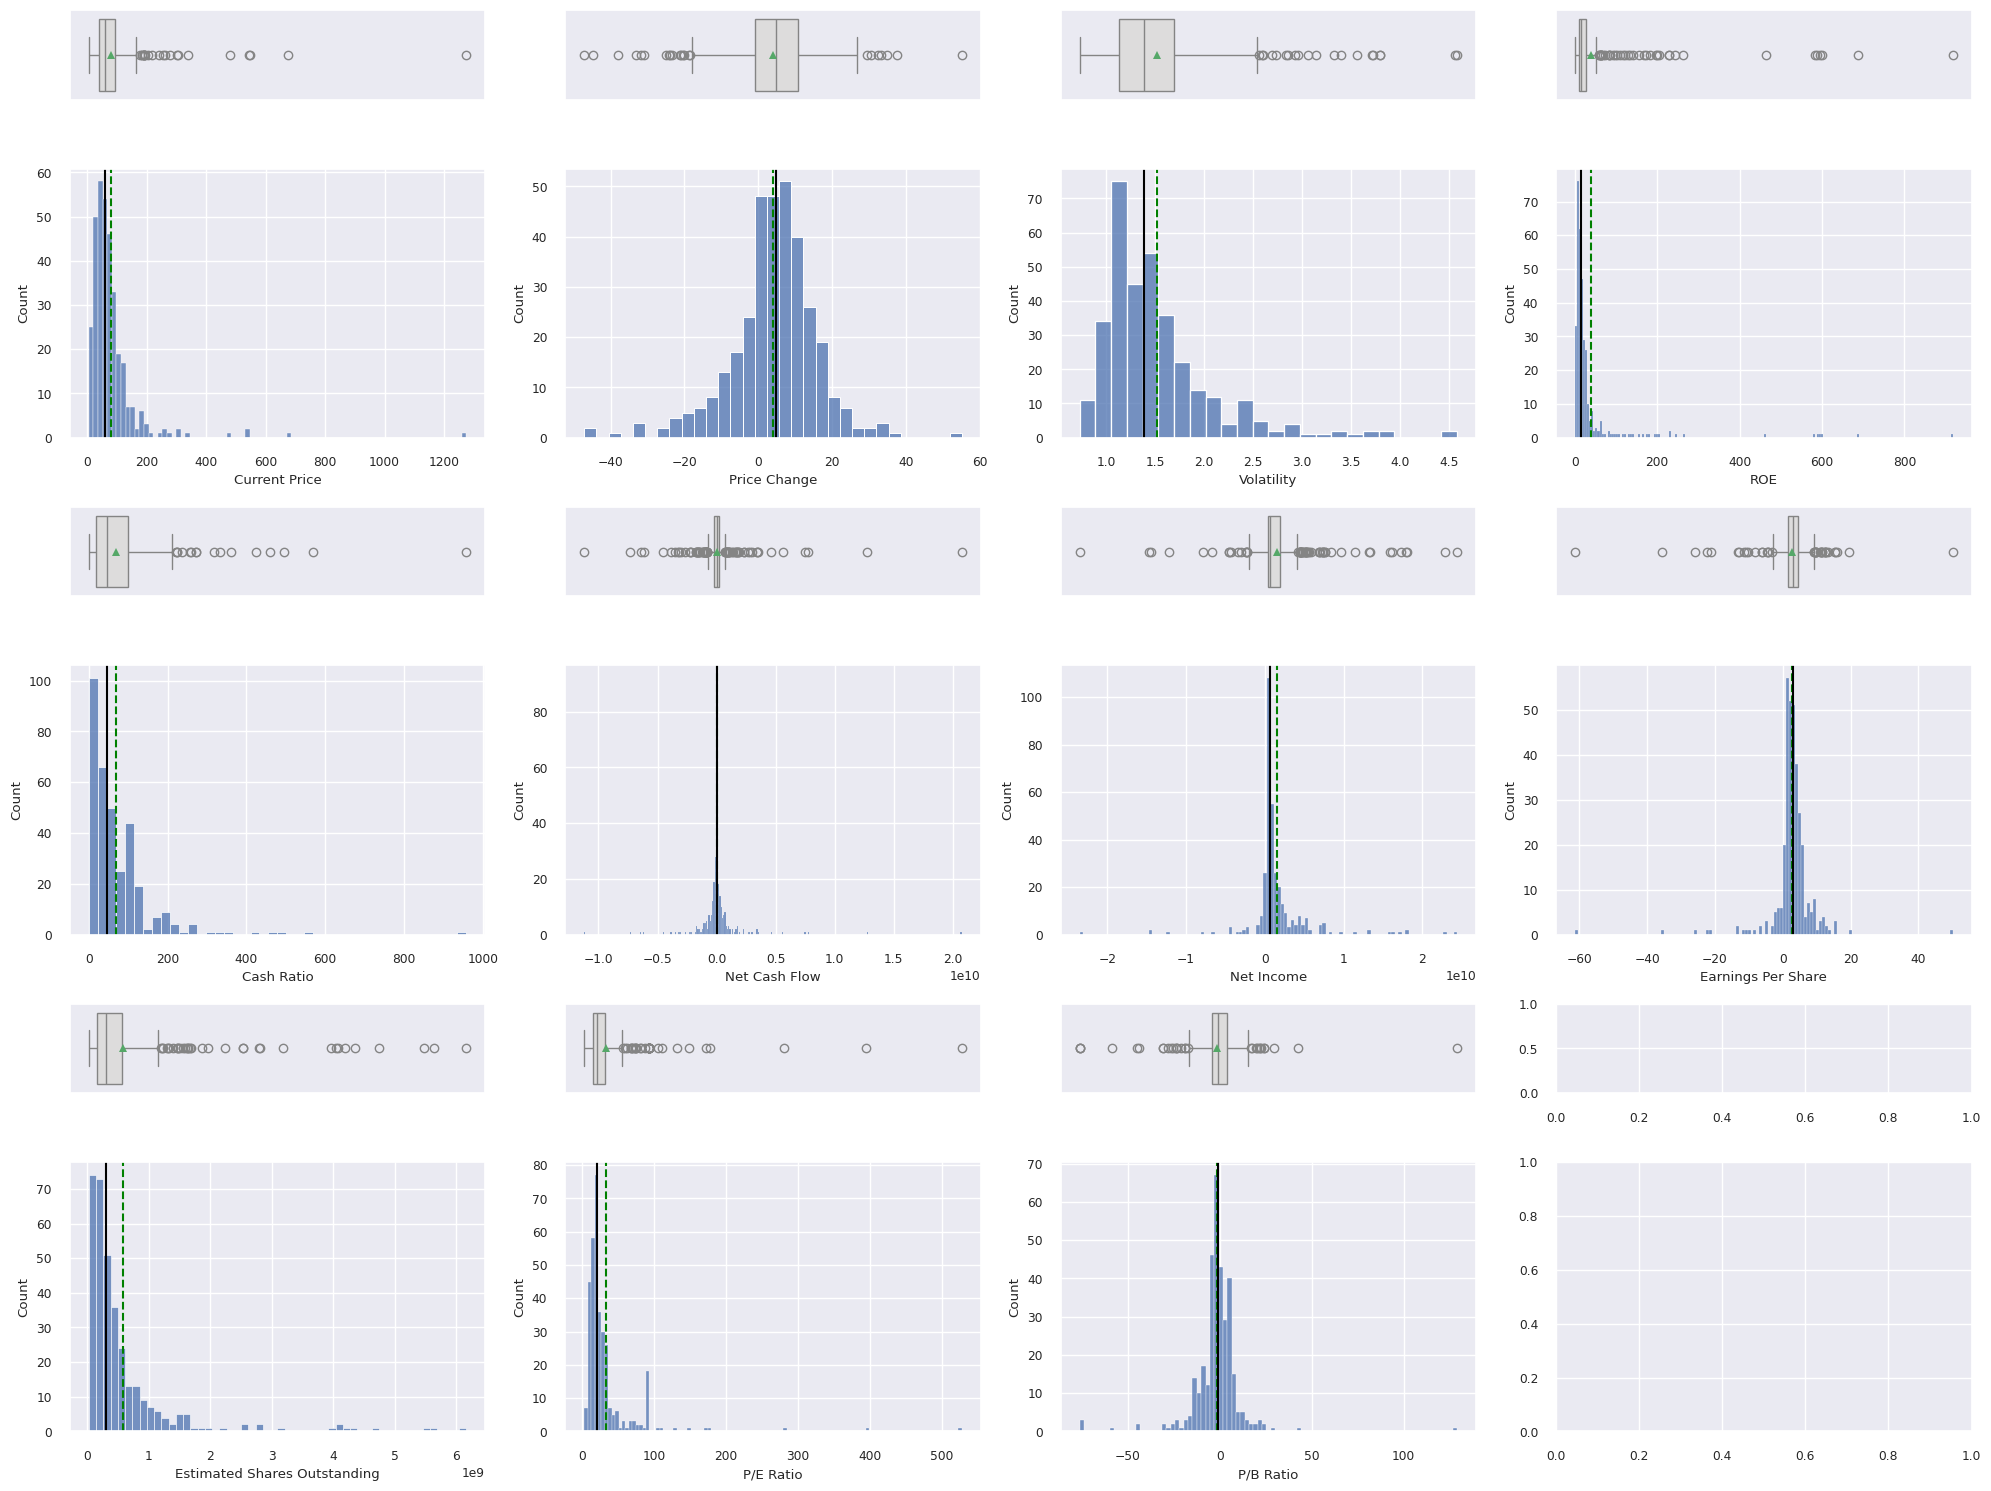

In [ ]:
histogram_boxplot_grid(df.select_dtypes(include=[np.number]))

**`GICS Sector`**

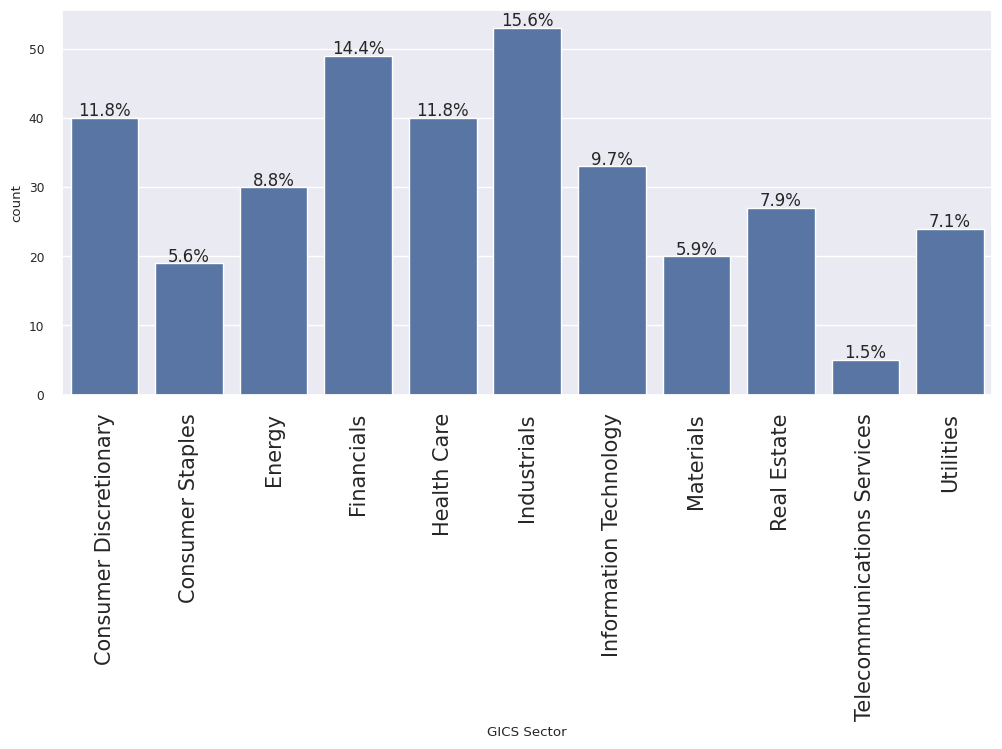

In [ ]:
labeled_barplot(df, 'GICS Sector', perc=True)

In [ ]:
# Group by 'GICS Sector' and count the number of securities
sector_counts = df.groupby('GICS Sector')['Security'].count()

# Calculate the percentage of the total for each sector
sector_percentage = (sector_counts / sector_counts.sum()) * 100

# Combine the counts and percentages into a single DataFrame for display
sector_summary = pd.DataFrame({'Count': sector_counts, 'Percentage': sector_percentage})

# Print the DataFrame
sector_summary


,Count,Percentage
GICS Sector,,
Consumer Discretionary,40,11.76471
Consumer Staples,19,5.58824
Energy,30,8.82353
Financials,49,14.41176
Health Care,40,11.76471
Industrials,53,15.58824
Information Technology,33,9.70588
Materials,20,5.88235
Real Estate,27,7.94118


**`GICS Sub Industry`**

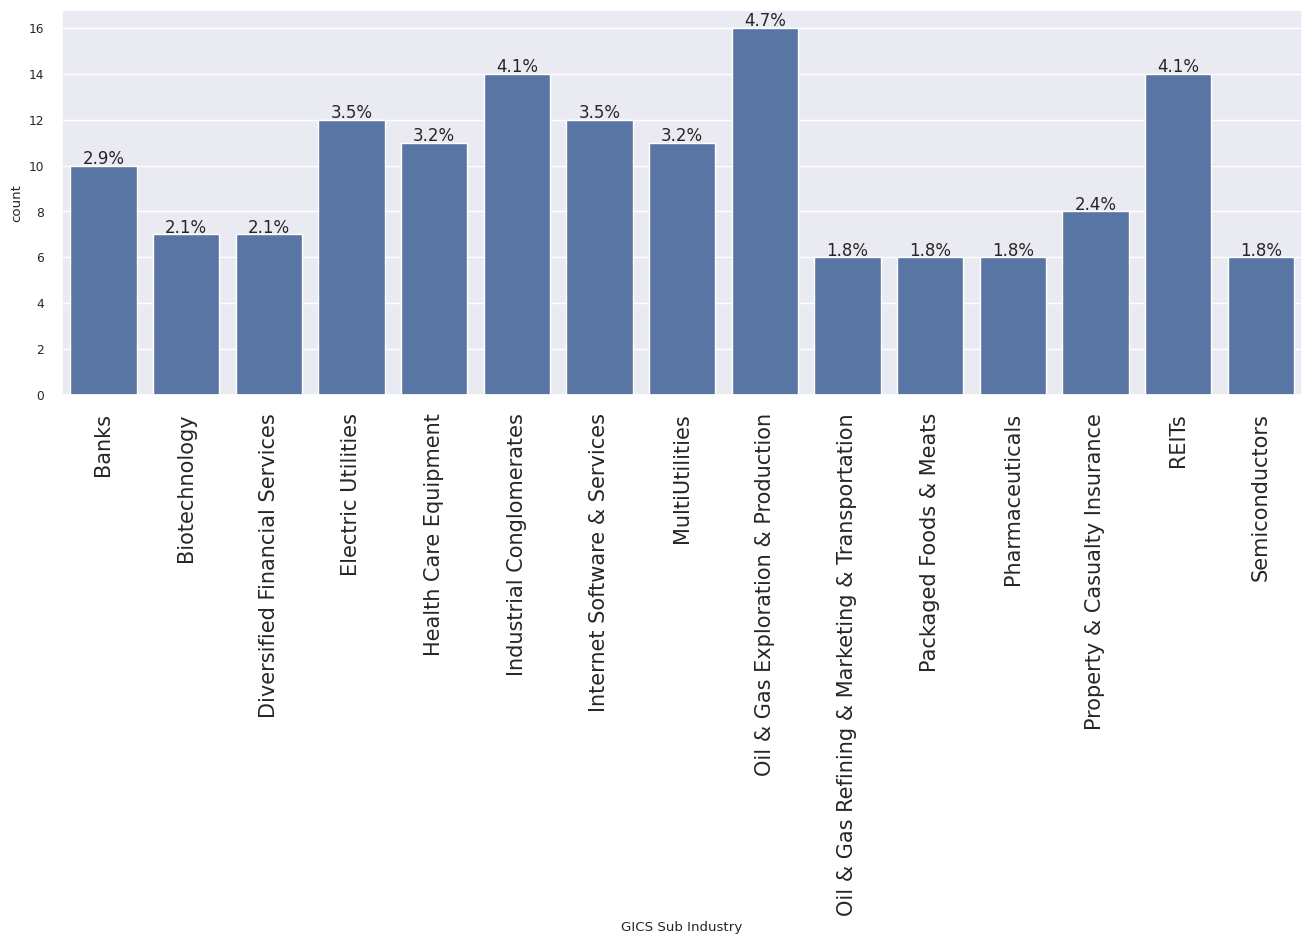

In [ ]:
labeled_barplot(df, 'GICS Sub Industry', perc=True, n=15)  ## Complete the code to create a labelled barplot for 'GICS Sub Industry'

In [ ]:
sub_industry_counts = df['GICS Sub Industry'].value_counts()

# Calculate the percentage of each sub-industry
sub_industry_percentage = (sub_industry_counts / sub_industry_counts.sum()) * 100

# Create a new DataFrame with counts and percentages
sub_industry_summary = pd.DataFrame({
    'Count': sub_industry_counts,
    'Percentage': sub_industry_percentage
})

# Display the top 15 records
top_sub_industries = sub_industry_summary.head(15)
top_sub_industries

,Count,Percentage
GICS Sub Industry,,
Oil & Gas Exploration & Production,16,4.70588
REITs,14,4.11765
Industrial Conglomerates,14,4.11765
Electric Utilities,12,3.52941
Internet Software & Services,12,3.52941
Health Care Equipment,11,3.23529
MultiUtilities,11,3.23529
Banks,10,2.94118
Property & Casualty Insurance,8,2.35294


### Bivariate Analysis

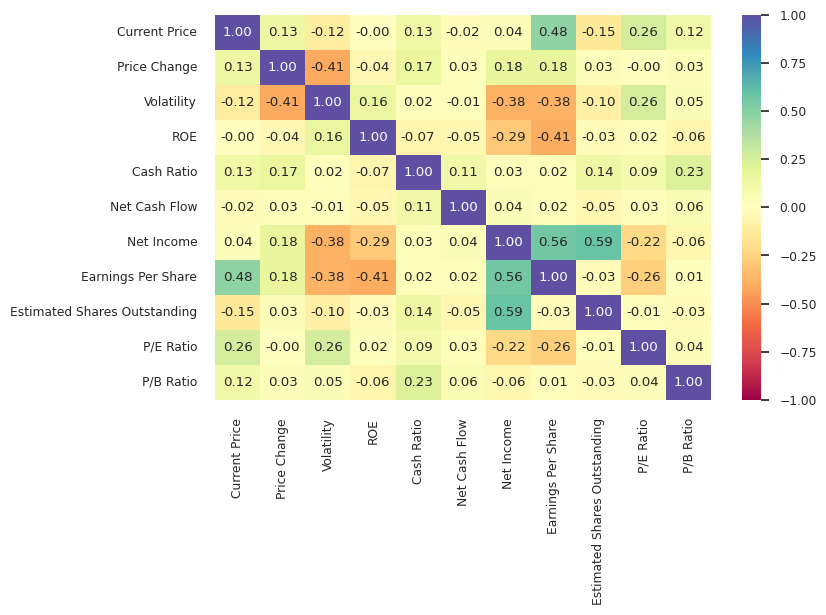

In [ ]:
# correlation check
#plt.figure(figsize=(15, 7))
sns.heatmap(
    df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Let's check the stocks of which economic sector have seen the maximum price increase on average.**

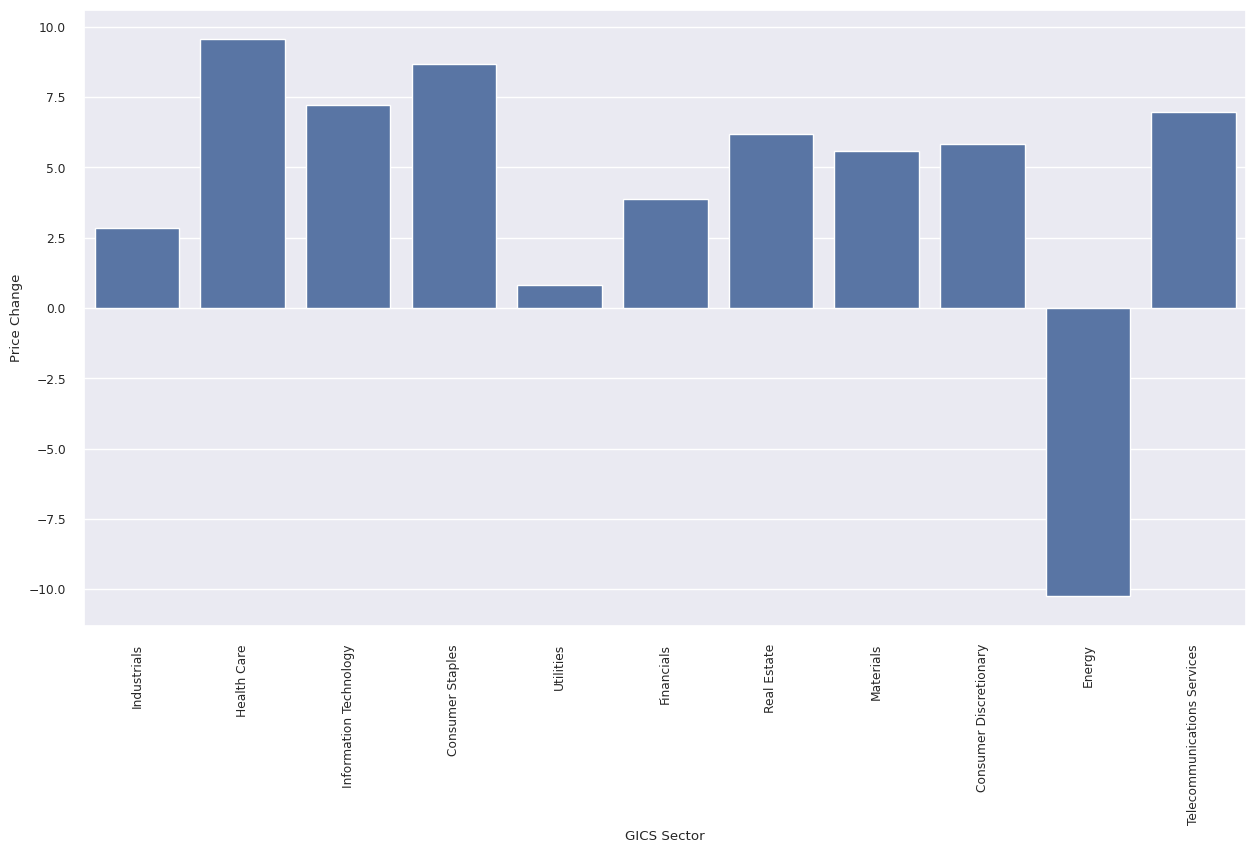

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. Let's see how the average cash ratio varies across economic sectors.**

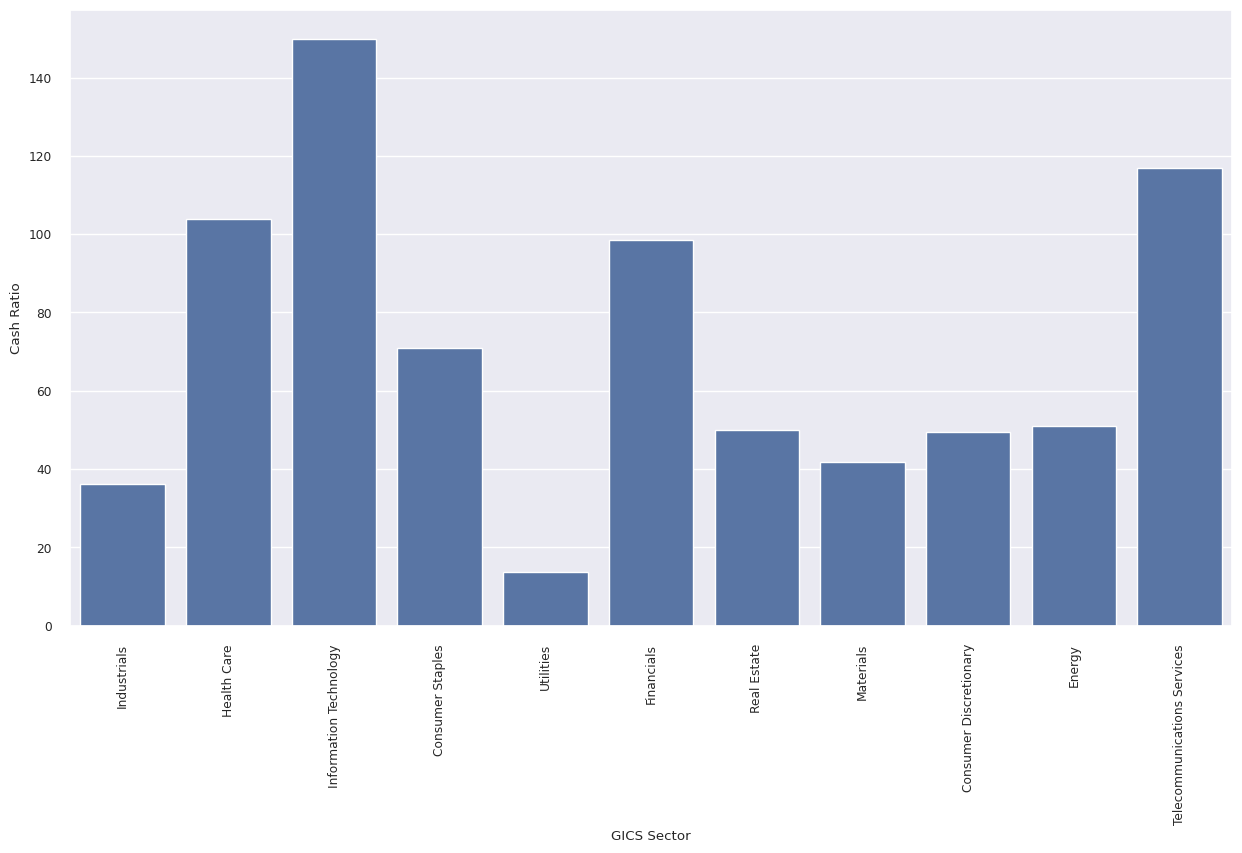

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. Let's see how the P/E ratio varies, on average, across economic sectors.**

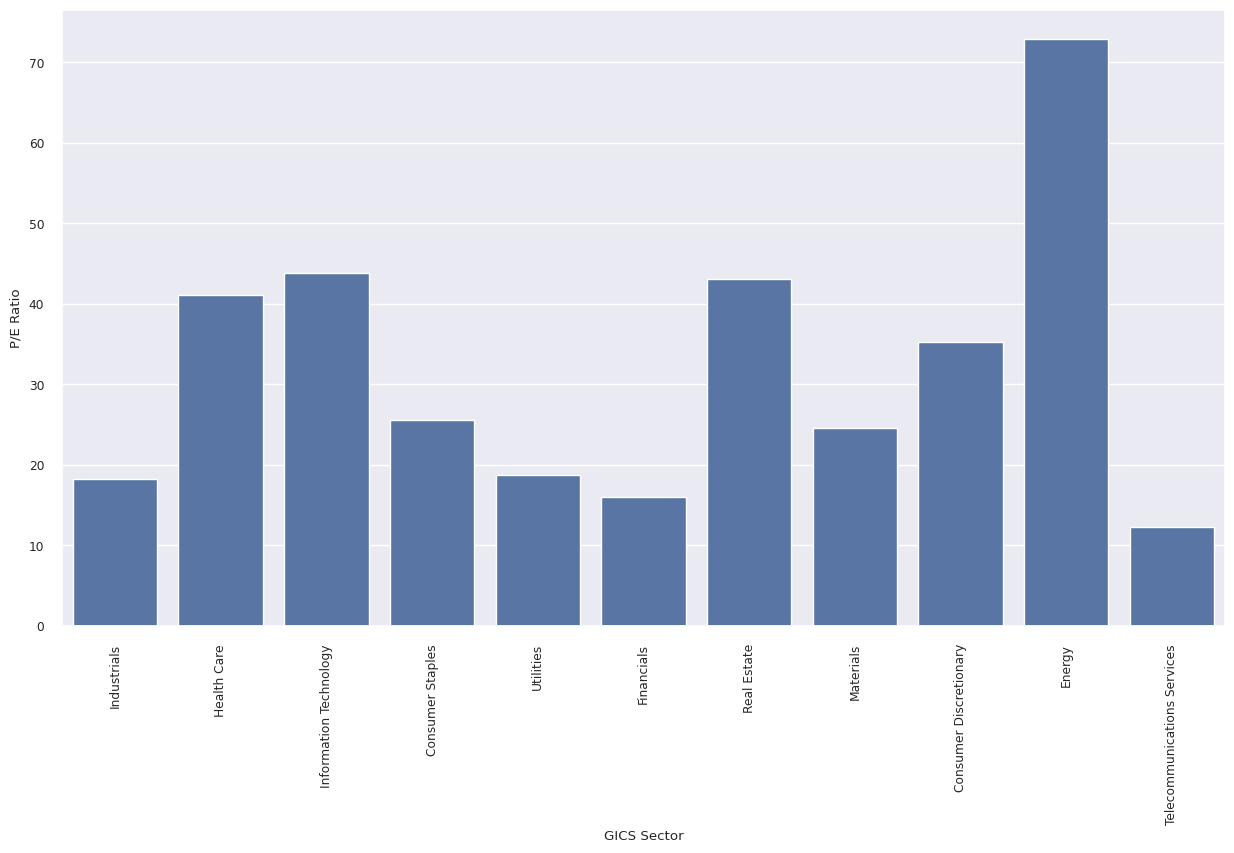

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby(['GICS Sector'])['P/E Ratio'].mean()

GICS Sector
Consumer Discretionary        35.21161
Consumer Staples              25.52120
Energy                        72.89771
Financials                    16.02315
Health Care                   41.13527
Industrials                   18.25938
Information Technology        43.78255
Materials                     24.58535
Real Estate                   43.06558
Telecommunications Services   12.22258
Utilities                     18.71941
Name: P/E Ratio, dtype: float64

**Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.**

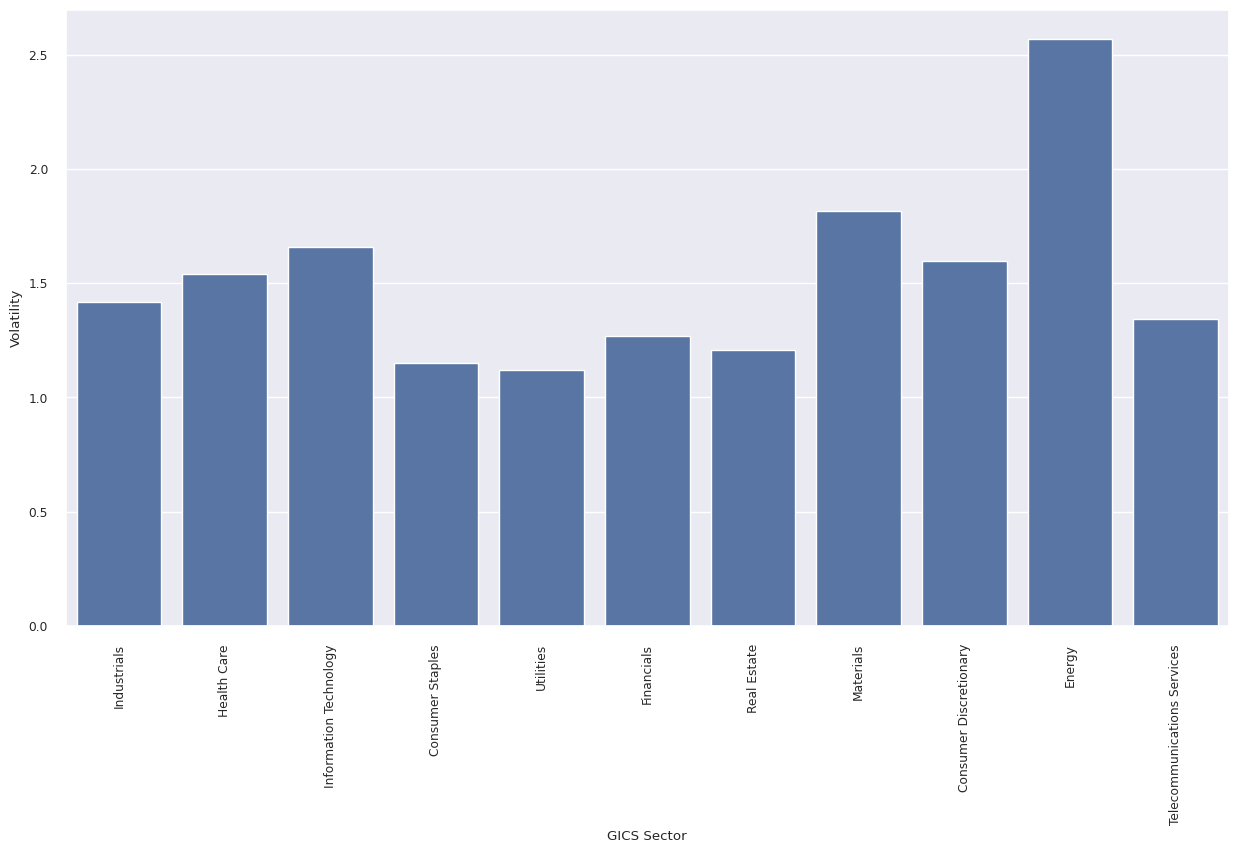

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby(['GICS Sector'])['Volatility'].mean()

GICS Sector
Consumer Discretionary        1.59548
Consumer Staples              1.15267
Energy                        2.56878
Financials                    1.26725
Health Care                   1.54102
Industrials                   1.41699
Information Technology        1.65980
Materials                     1.81673
Real Estate                   1.20605
Telecommunications Services   1.34161
Utilities                     1.11802
Name: Volatility, dtype: float64

## Data Preprocessing

### Outlier Check

- Let's plot the boxplots of all numerical columns to check for outliers.

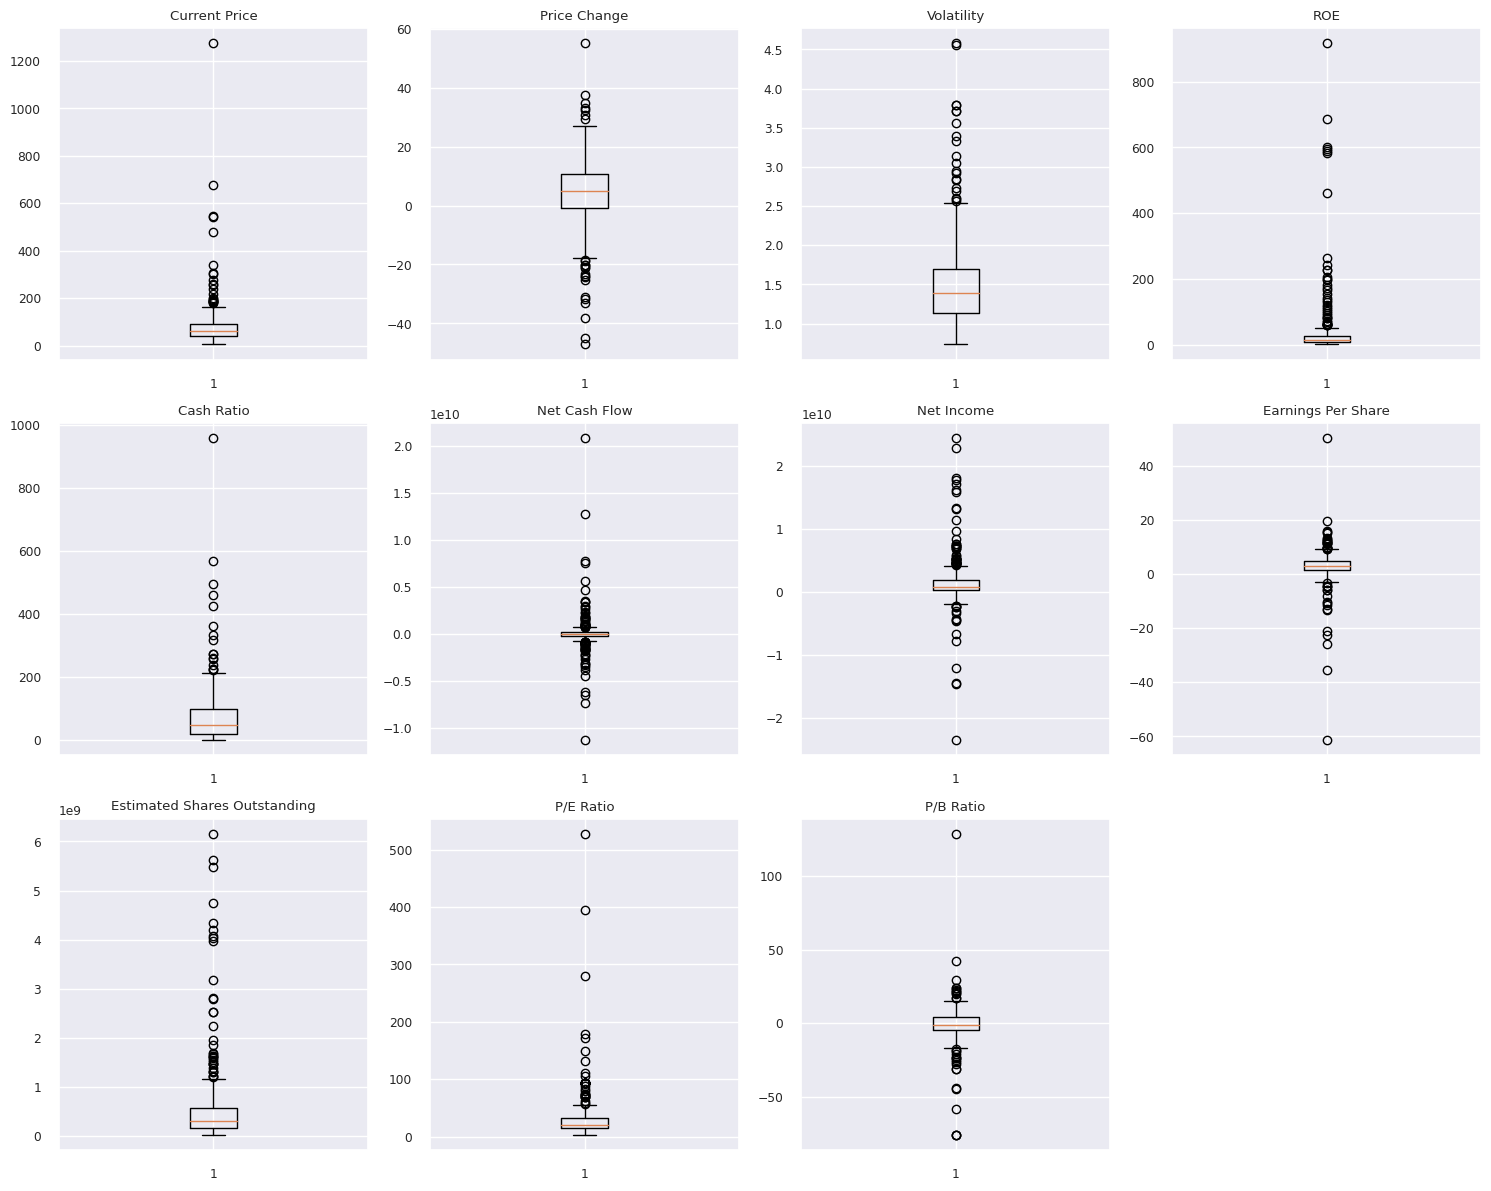

In [ ]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5 )
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Scaling

- Let's scale the data before we proceed with clustering.

In [ ]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df[numeric_columns]  ## Complete the code to scale the data
subset_scaled = scaler.fit_transform(subset)

In [ ]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)
subset_scaled_df

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.39334,0.49395,0.27275,0.98960,-0.21070,-0.33936,1.55442,1.30940,0.10786,-0.65249,-0.50665
1,-0.22084,0.35544,1.13704,0.93774,0.07727,-0.00233,0.92763,0.05675,1.25027,-0.31177,-0.50420
2,-0.36719,0.60248,-0.42701,-0.19290,-0.03349,0.45406,0.74437,0.02483,1.09802,-0.39150,0.09494
3,0.13357,0.82570,-0.28480,-0.31738,1.21806,-0.15250,-0.21982,-0.23056,-0.09162,0.94715,0.42433
4,-0.26087,-0.49264,0.29647,-0.26551,2.23702,0.13356,-0.20270,-0.37498,1.97840,3.29331,0.19920
...,...,...,...,...,...,...,...,...,...,...,...
335,-0.48618,0.90165,0.54012,-0.25514,4.30816,-0.55967,-1.48778,-1.12748,0.42911,-0.08212,0.57219
336,-0.28951,-1.06577,-0.07970,1.06221,-0.47651,0.05324,-0.05119,0.02939,-0.16774,-0.33715,-0.15201
337,0.22191,0.43954,-0.20607,-0.40036,0.33201,0.16489,-0.34247,-0.30353,-0.46006,2.23363,-1.58939
338,-0.54705,-0.43681,-0.09781,-0.36924,0.32093,-0.05102,-0.30117,-0.23968,-0.37785,-0.22271,0.11868


In [ ]:
subset_scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.00000,0.00000,1.00147,-0.77992,-0.43210,-0.21609,0.12274,12.19567
Price Change,340.00000,-0.00000,1.00147,-4.27136,-0.41854,0.06183,0.55196,4.25181
Volatility,340.00000,-0.00000,1.00147,-1.34164,-0.66184,-0.23756,0.28696,5.16826
ROE,340.00000,0.00000,1.00147,-0.40036,-0.30960,-0.25514,-0.13067,9.10118
Cash Ratio,340.00000,-0.00000,1.00147,-0.77556,-0.57619,-0.25500,0.32093,9.83491
Net Cash Flow,340.00000,0.00000,1.00147,-5.79549,-0.12835,-0.02750,0.05880,10.65524
Net Income,340.00000,0.00000,1.00147,-6.35998,-0.29029,-0.20005,0.10284,5.83263
Earnings Per Share,340.00000,0.00000,1.00147,-9.72573,-0.18534,0.01799,0.28022,7.19257
Estimated Shares Outstanding,340.00000,-0.00000,1.00147,-0.65043,-0.49512,-0.31654,-0.00463,6.60932
P/E Ratio,340.00000,0.00000,1.00147,-0.67016,-0.39671,-0.26630,-0.01915,11.18762


## K-means Clustering

### Checking Elbow Plot

In [ ]:
start_time = time.time()  # Start the timer

In [ ]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912


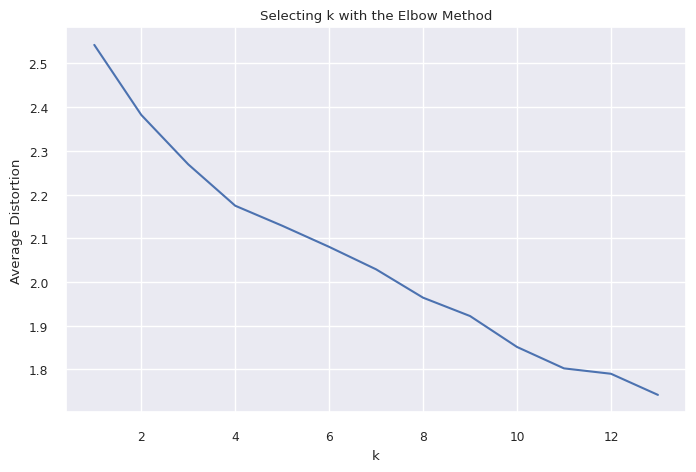

In [ ]:
clusters = range(1, 14)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

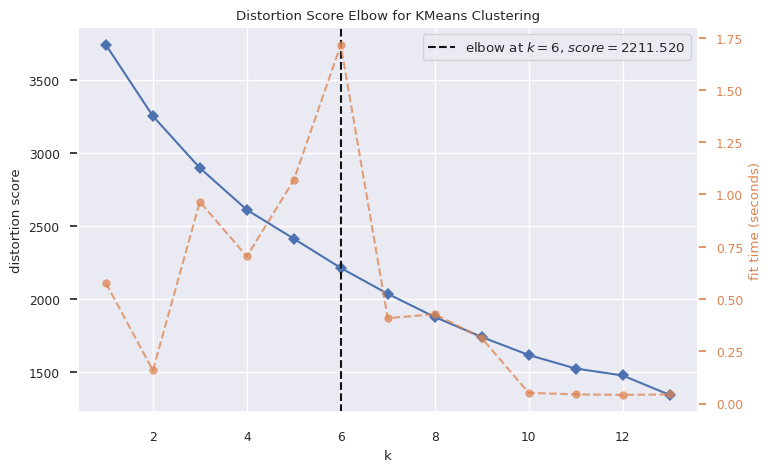

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 14), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

### Let's check the silhouette scores

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)


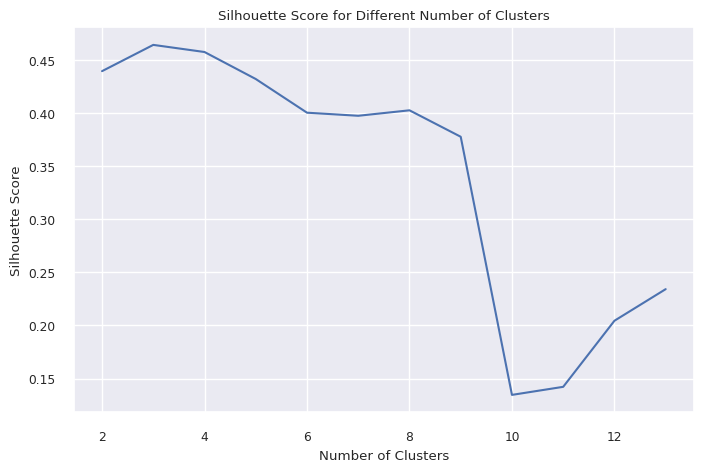

In [ ]:
sil_score = []
cluster_list = range(2, 14)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Number of Clusters")
plt.show()

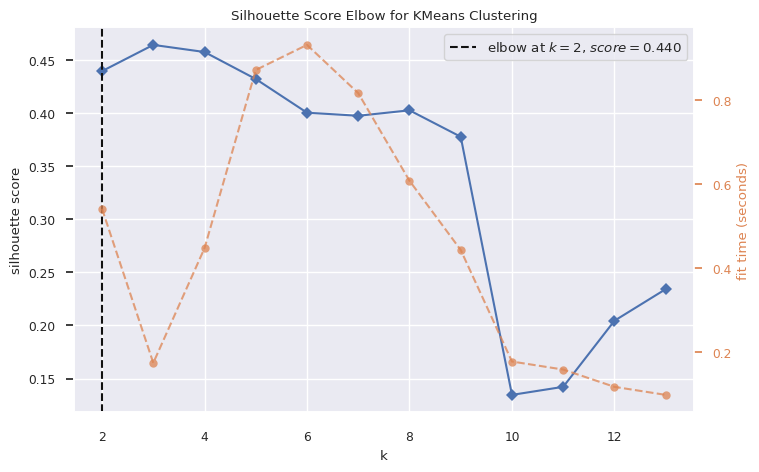

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 14), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

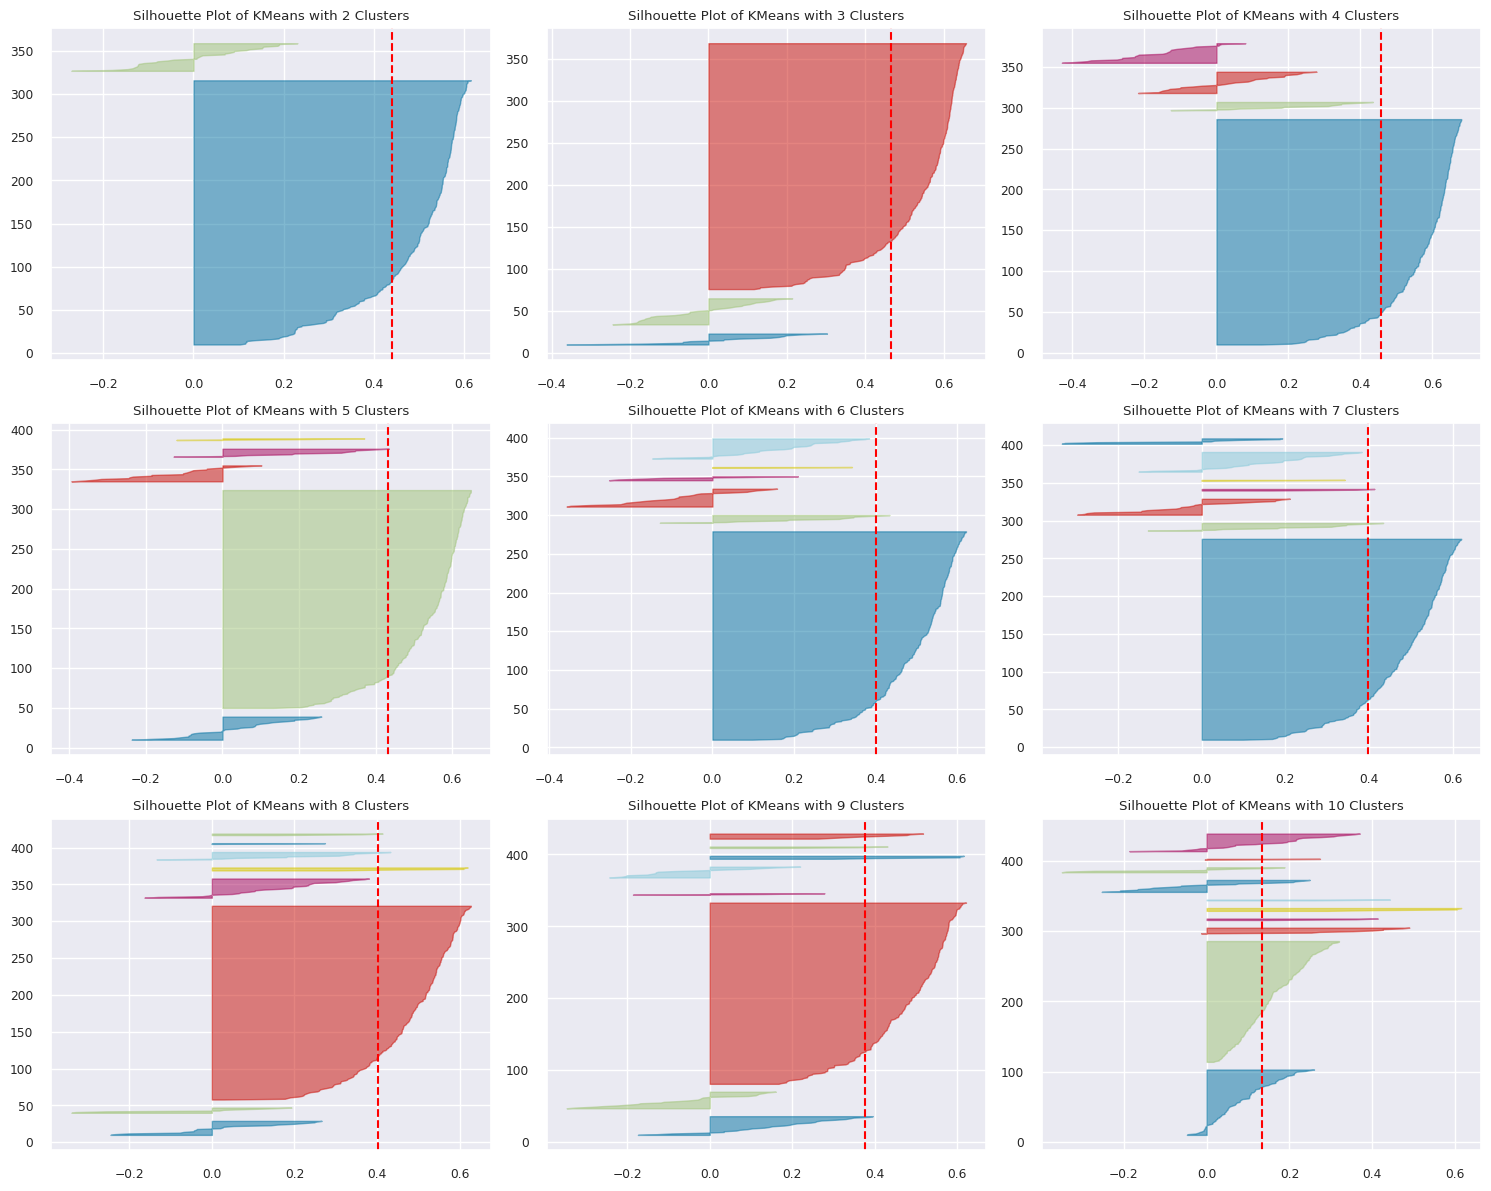

In [ ]:
# Set up the figure with multiple subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through cluster counts from 2 to 10
for idx, n_clusters in enumerate(range(2, 11)):
    # Create a KMeans instance with clusters and a fixed random state
    model = KMeans(n_clusters=n_clusters, random_state=1)

    # Create a SilhouetteVisualizer, passing the model and the specific subplot axis
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=axes[idx])

    # Fit the visualizer
    visualizer.fit(k_means_df)

    # Set the title for each subplot
    axes[idx].set_title(f'Silhouette Plot of KMeans with {n_clusters} Clusters')

# Hide any unused axes if there are any
for ax in axes[len(range(2, 11)):]:
    ax.set_visible(False)

# Display the plots
plt.tight_layout()
plt.show()


### Creating Final Model

In [ ]:
# final K-means model
kmeans = KMeans(n_clusters=6, random_state=1)  ## Complete the code to choose the number of clusters
kmeans.fit(k_means_df)

KMeans(n_clusters=6, random_state=1)

In [ ]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

### Cluster Profiling

In [ ]:
km_cluster_profile = df1.select_dtypes(include=[np.number]).groupby("KM_segments").mean()  ## Complete the code to groupby the cluster labels

In [ ]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Security"].count().values  ## Complete the code to groupby the cluster labels
)

In [ ]:
km_cluster_profile.style.highlight_max(color="lightblue", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,73.854019,5.116180,1.369515,35.262963,50.637037,4512725.925926,1512994744.444444,3.723870,430296731.305963,23.486573,-3.567829,270
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,111.612223,11.789464,1.787972,26.125000,290.083333,1450830291.666667,1499538625.000000,2.993750,700417074.282083,44.575135,13.972648,24
3,557.499989,17.445166,1.714325,12.000000,158.000000,116336500.000000,773142833.333333,12.396667,215235860.658333,225.136796,7.666157,6
4,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
5,34.231808,-15.515565,2.832069,48.037037,47.740741,-128651518.518519,-2444318518.518518,-6.284444,503031539.057037,75.627265,1.655990,27


In [ ]:
## Complete the code to print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Archer-Daniels-Midland Co' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Activision Blizzard' 'AvalonBay Communities, Inc.'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Limited' 'CBRE Group'
 'Crown Castle International Corp.' 'Ca

In [ ]:
df1.groupby(['KM_segments'])['Security'].nunique()

KM_segments
0    270
1     11
2     24
3      6
4      2
5     27
Name: Security, dtype: int64

In [ ]:
df1.groupby(["KM_segments", "GICS Sector"])['Security'] \
   .count() \
   .reset_index(name='count') \
   .sort_values(['KM_segments', 'count'], ascending=[True, False]) \
   .set_index(["KM_segments", "GICS Sector"])


count
KM_segments GICS Sector                       
0           Industrials                     51
            Financials                      45
            Consumer Discretionary          33
            Health Care                     30
            Real Estate                     26
            Utilities                       24
            Information Technology          20
            Consumer Staples                17
            Materials                       17
            Energy                           5
            Telecommunications Services      2
1           Financials                       3
            Health Care                      2
            Telecommunications Services      2
            Consumer Discretionary           1
            Consumer Staples                 1
            Energy                           1
            Information Technology           1
2           Information Technology           9
            Health Care                      5
            Consumer Discretionary           4
            Consumer Staples                 1
            Energy                           1
            Financials                       1
            Materials                        1
            Real Estate                      1
            Telecommunications Services      1
3           Health Care                      3
            Consumer Discretionary           2
            Information Technology           1
4           Energy                           2
5           Energy                          21
            Industrials                      2
            Information Technology           2
            Materials                        2

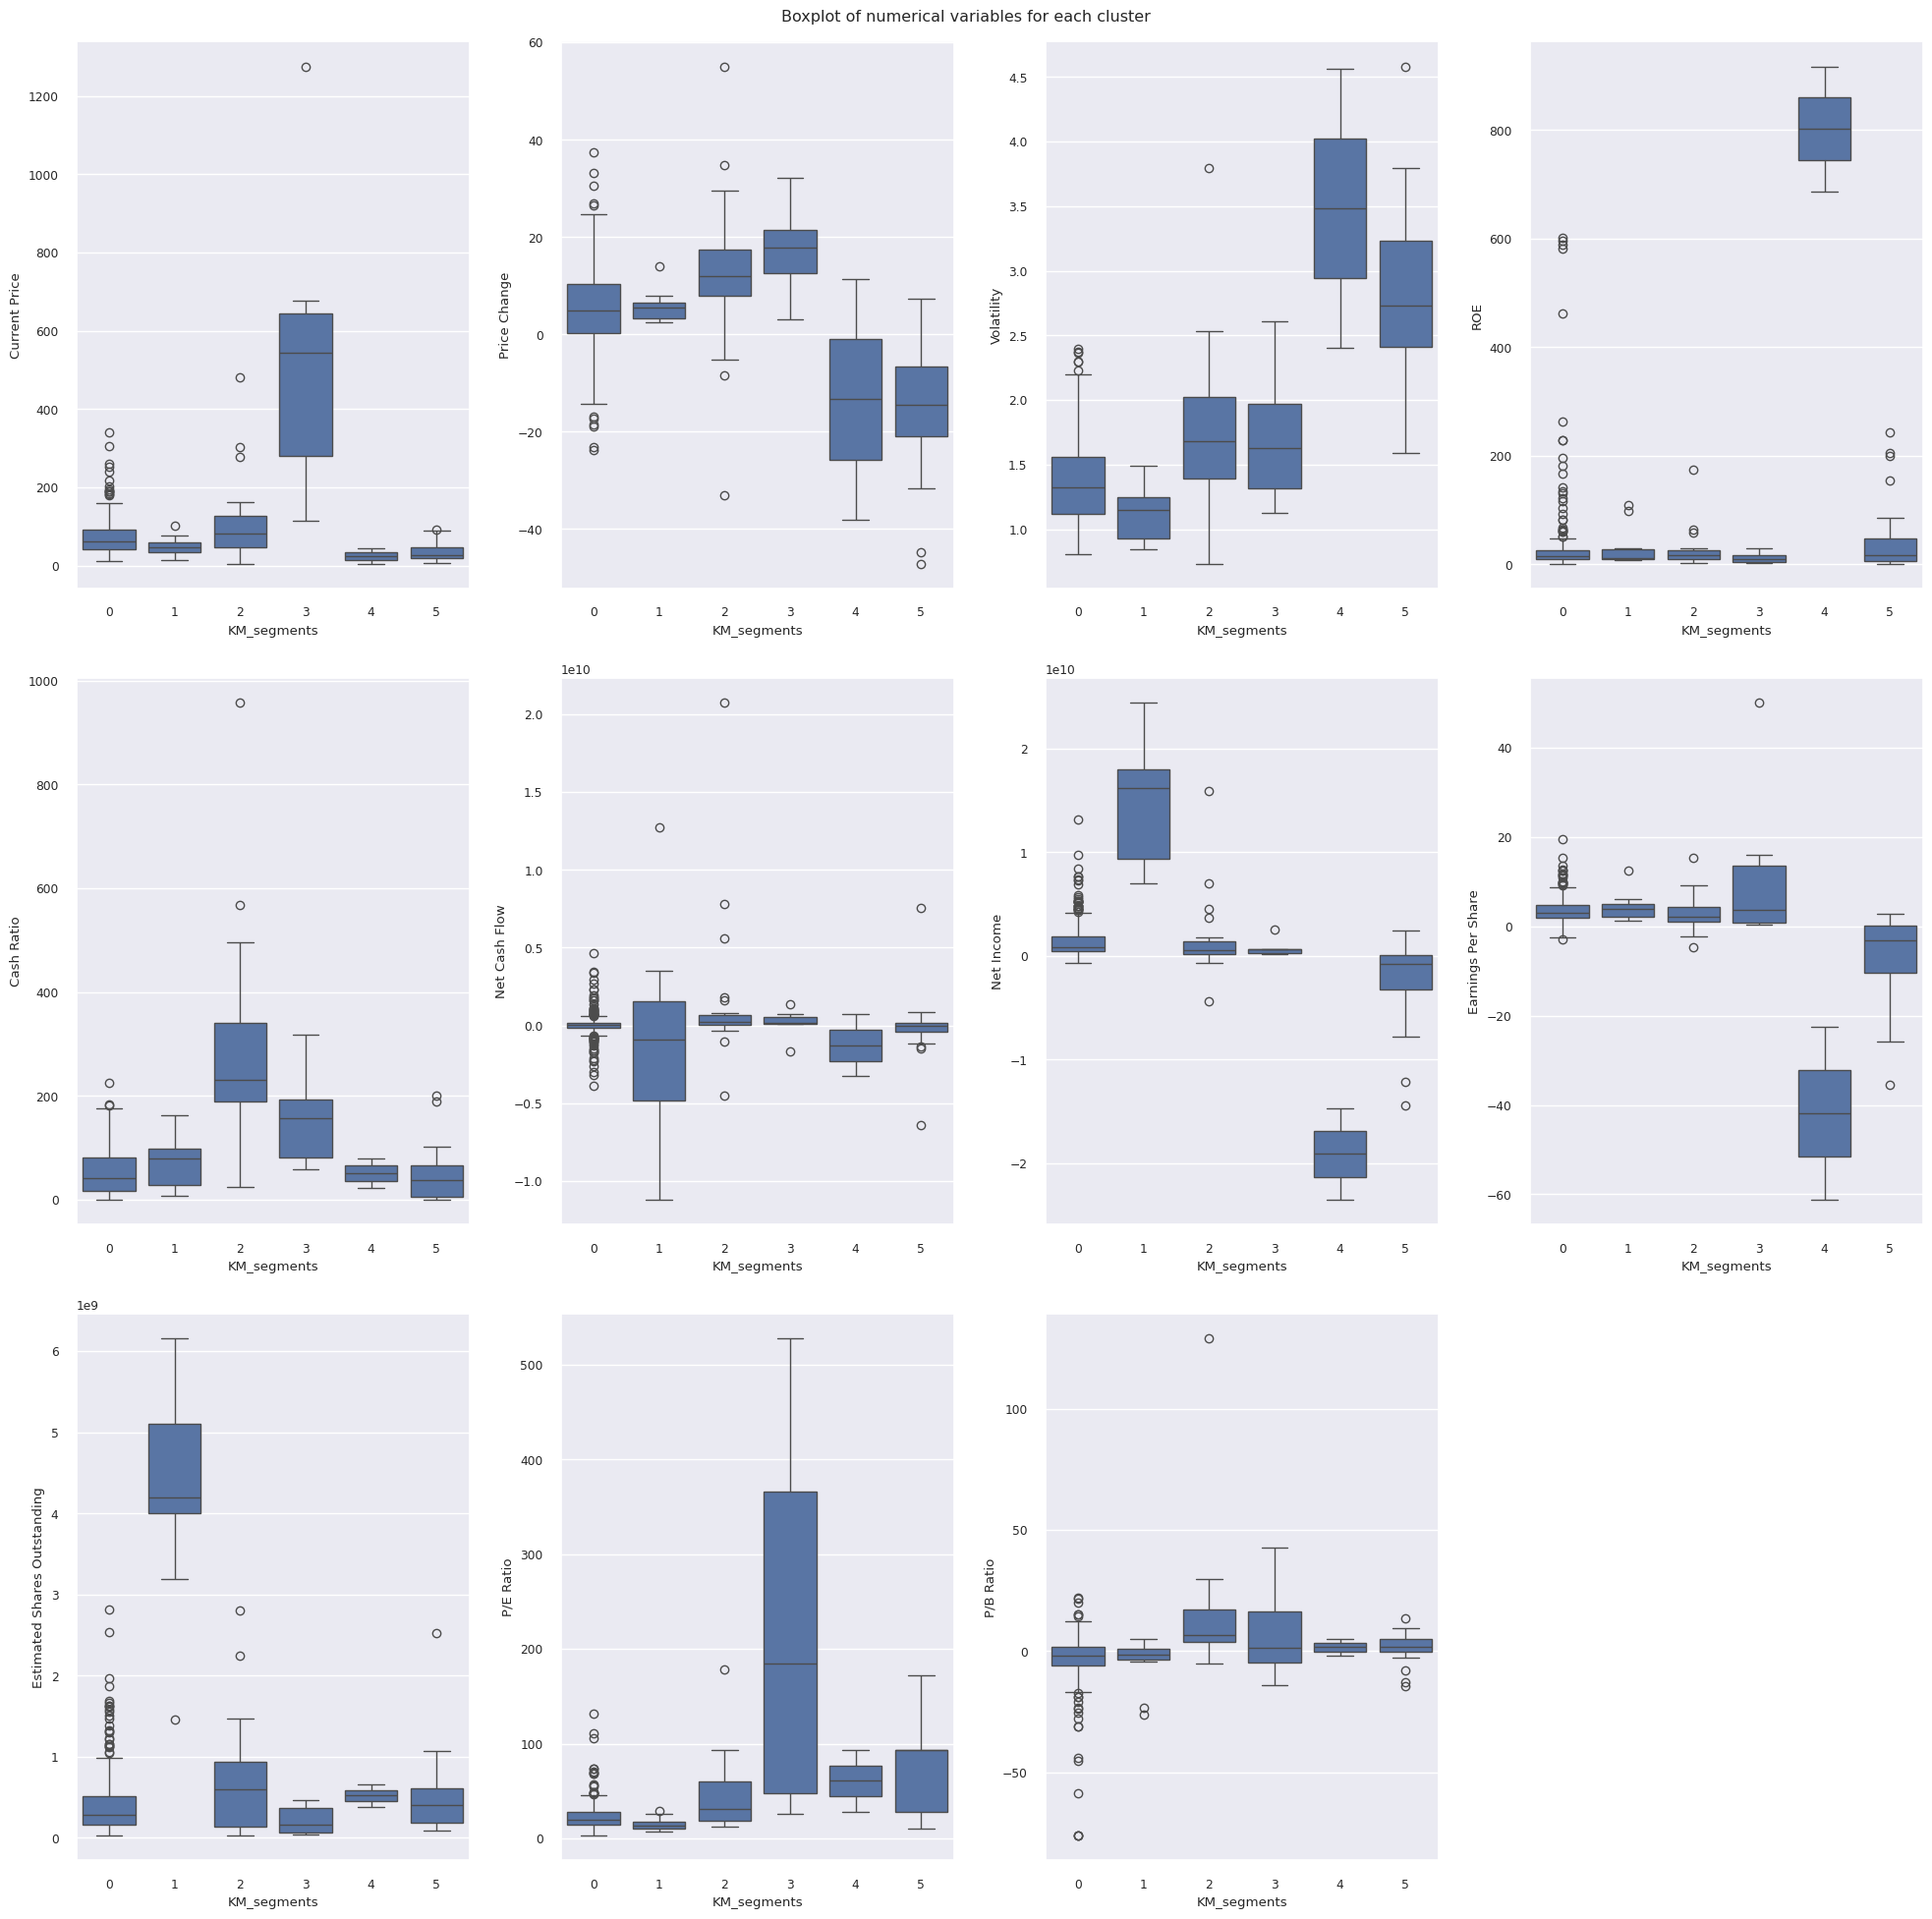

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

### Insights

Analyzing the cluster features, we look for the distinctive characteristics of each cluster based on their centroids in the multi-dimensional space of the dataset's features. Here's an analysis of each cluster based on the mean values of the features provided:

- **Cluster 0 (Largest, Balanced Performance)**
  - Most common with 270 members.
  - Moderate values in financial metrics, no extremes.
  - Dominated by Industrials and Financials.
  - Good cluster for investors seeking diversified, stable stocks.

- **Cluster 1 (High Net Worth, Negative Cash Flow)**
  - Smallest cluster with only 11 stocks.
  - Highest Net Income, negative Net Cash Flow.
  - Financials and Health Care lead.
  - High risk due to negative cash flow despite high net worth.

- **Cluster 2 (High Valuation, Tech-Lead)**
  - 24 stocks with high P/E and P/B ratios.
  - Strong presence in Information Technology.
  - Suitable for growth-focused investors due to high valuation metrics.

- **Cluster 3 (Premium Pricing, Health Care Inclined)**
  - Only 6 stocks, very high Current Price and P/E Ratio.
  - Health Care centric.
  - Likely overvalued stocks or with high investor expectations.

- **Cluster 4 (Extreme Negative Features, Energy Sector)**
  - 2 stocks with extreme negative values across several features.
  - Both in Energy sector.
  - Bad cluster indicating financially troubled companies.

- **Cluster 5 (Negative Performers, Energy Dominated)**
  - 27 stocks, most with negative Price Change and ROE.
  - Predominantly Energy sector stocks.
  - Another bad cluster indicating underperforming companies.

**Concluding Remark**
Clusters indicate a clear division between sectors with stable, high-performing stocks and those under financial duress, particularly in Energy, guiding investment choices towards more promising sectors like Industrials and Technology.

In [ ]:
end_time = time.time()  # End the timer
kmeans_execution_time = end_time - start_time
print(f"K-Means clustering took {kmeans_execution_time} seconds.")

K-Means clustering took 693.9792561531067 seconds.


## Hierarchical Clustering

In [ ]:
start_time = time.time()

### Computing Cophenetic Correlation

In [ ]:
hc_df = subset_scaled_df.copy()

Highest Cophenetic Correlation Coefficient: 0.9422540609560814
Distance Metric: euclidean
Linkage Method: average


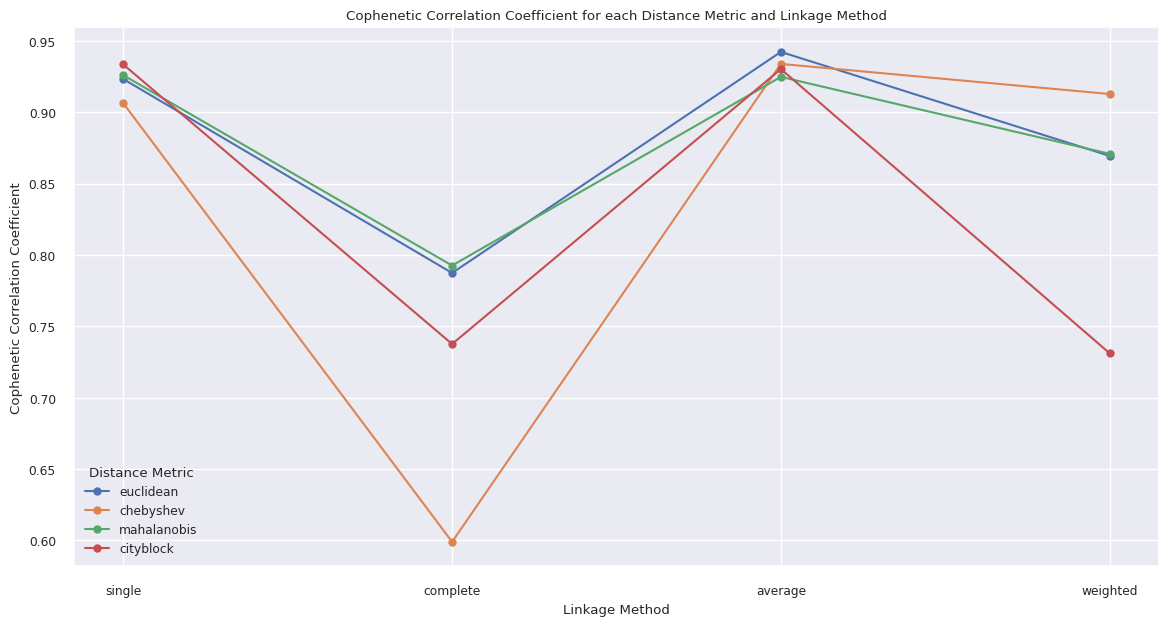

,Distance Metric,Linkage Method,Cophenetic Correlation Coefficient
0,euclidean,single,0.92323
1,euclidean,complete,0.78733
2,euclidean,average,0.94225
3,euclidean,weighted,0.86938
4,chebyshev,single,0.90625
5,chebyshev,complete,0.59889
6,chebyshev,average,0.93383
7,chebyshev,weighted,0.91274
8,mahalanobis,single,0.92592
9,mahalanobis,complete,0.79253


In [ ]:
# List of distance metrics and linkage methods
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]
linkage_methods = ["single", "complete", "average", "weighted"]

# Initialize a list to store the results
results = []

# Calculate Cophenetic Correlation Coefficients
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        coph_corr, _ = cophenet(Z, pdist(hc_df))
        results.append({'Distance Metric': dm, 'Linkage Method': lm, 'Cophenetic Correlation Coefficient': coph_corr})

# Convert the list of results to a DataFrame
cophenetic_corrs = pd.DataFrame(results)

# Find the row with the highest CCC
highest_ccc_row = cophenetic_corrs.loc[cophenetic_corrs['Cophenetic Correlation Coefficient'].idxmax()]

# Print the Distance Metric, Linkage Method, and CCC where CCC is highest
print(f"Highest Cophenetic Correlation Coefficient: {highest_ccc_row['Cophenetic Correlation Coefficient']}")
print(f"Distance Metric: {highest_ccc_row['Distance Metric']}")
print(f"Linkage Method: {highest_ccc_row['Linkage Method']}")

# Plot a chart for CCC for each Distance Metric and Linkage Method
plt.figure(figsize=(14, 7))
for dm in distance_metrics:
    subset = cophenetic_corrs[cophenetic_corrs['Distance Metric'] == dm]
    plt.plot(subset['Linkage Method'], subset['Cophenetic Correlation Coefficient'], marker='o', label=dm)

plt.title('Cophenetic Correlation Coefficient for each Distance Metric and Linkage Method')
plt.xlabel('Linkage Method')
plt.ylabel('Cophenetic Correlation Coefficient')
plt.legend(title='Distance Metric')
plt.grid(True)
plt.show()

cophenetic_corrs

**Let's explore different linkage methods with Euclidean distance only.**

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


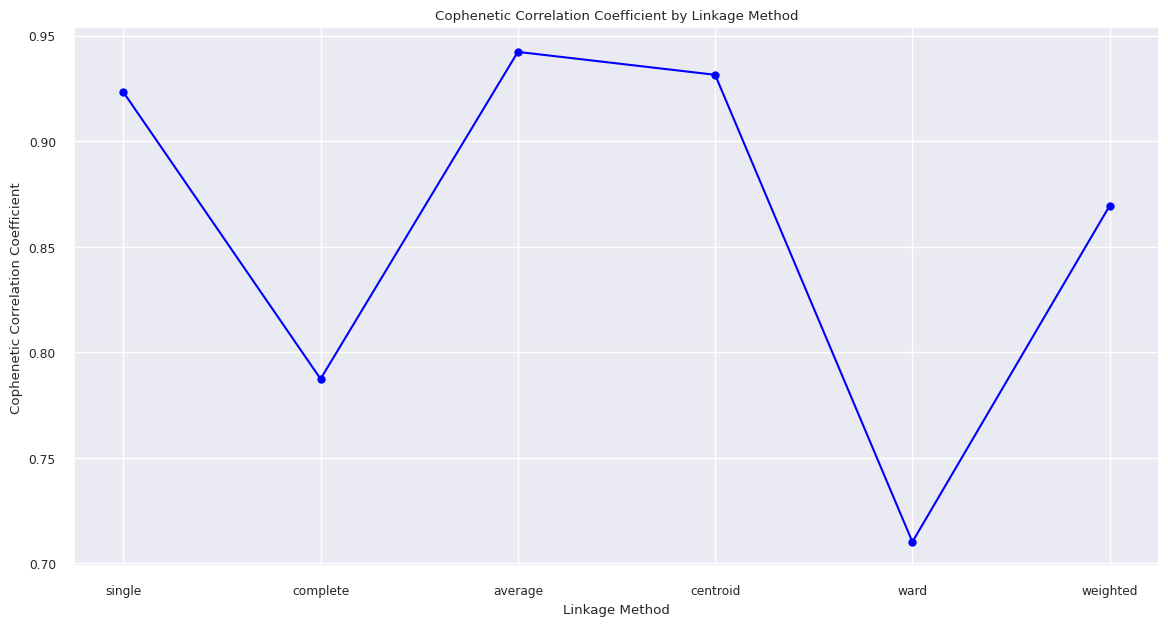

,Linkage Method,Cophenetic Correlation Coefficient
0,single,0.92323
1,complete,0.78733
2,average,0.94225
3,centroid,0.93140
4,ward,0.71012
5,weighted,0.86938


In [ ]:
# List of linkage methods including additional methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# DataFrame to store Cophenetic Correlation Coefficients
ccc_data = []

# Compute CCC for each linkage method using Euclidean distance
for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    coph_corr, _ = cophenet(Z, pdist(hc_df))
    ccc_data.append({'Linkage Method': lm, 'Cophenetic Correlation Coefficient': coph_corr})
    print(f"Cophenetic correlation for {lm} linkage is {coph_corr}.")

# Convert list to DataFrame
ccc_df = pd.DataFrame(ccc_data)

# Find the highest CCC
highest_ccc = ccc_df['Cophenetic Correlation Coefficient'].max()
best_method = ccc_df.loc[ccc_df['Cophenetic Correlation Coefficient'].idxmax(), 'Linkage Method']

# Print the best method and its CCC
print('*' * 100)
print(f"Highest cophenetic correlation is {highest_ccc}, which is obtained with {best_method} linkage.")

# Let's create a line plot with markers to clearly display the Cophenetic Correlation Coefficients for each linkage method.
plt.figure(figsize=(14, 7))
plt.plot(ccc_df['Linkage Method'], ccc_df['Cophenetic Correlation Coefficient'], marker='o', linestyle='-', color='blue')
plt.title('Cophenetic Correlation Coefficient by Linkage Method')
plt.xlabel('Linkage Method')
plt.ylabel('Cophenetic Correlation Coefficient')
plt.grid(True)
plt.show()

ccc_df

**Let's view the dendrograms for the different linkage methods with Euclidean distance.**

### Checking Dendrograms

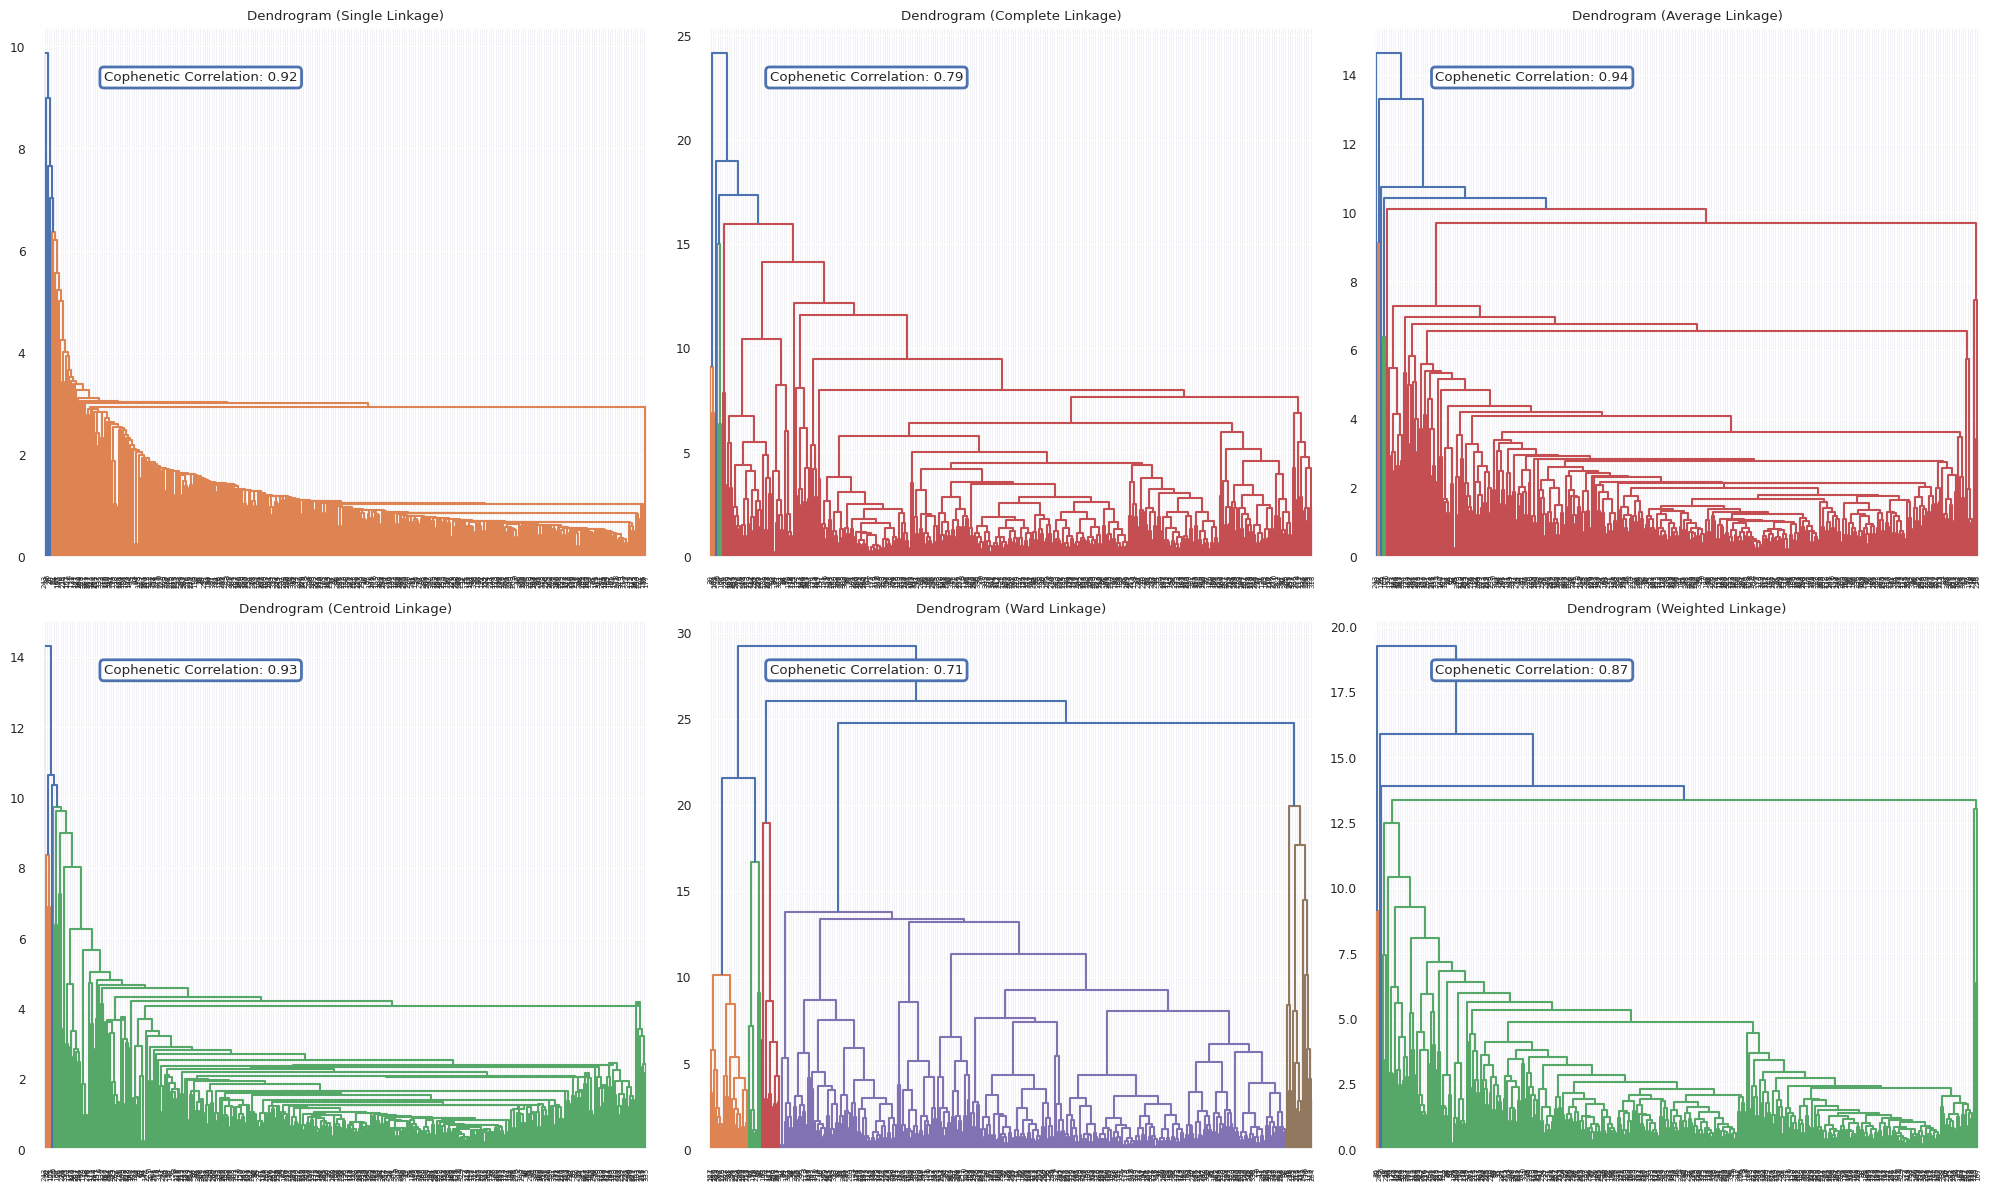

In [ ]:
# Assuming hc_df is a DataFrame with data
# List of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]
compare = []
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# Create a subplot layout: 3 plots per row
fig, axs = plt.subplots((len(linkage_methods) + 1) // 3, 3, figsize=(20,6 * len(linkage_methods) // 3))
axs = axs.flatten()  # Flatten to 1D for easy iteration

# Iterate through the linkage methods
for i, method in enumerate(linkage_methods):
    # Compute the linkage matrix
    Z = linkage(hc_df, metric="euclidean", method=method)
    # Plot the dendrogram
    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')

    # Calculate the cophenetic correlation coefficient
    coph_corr, coph_dists = cophenet(Z, pdist(hc_df))
    # Annotate the cophenetic correlation on the plot
    axs[i].annotate(f'Cophenetic Correlation: {coph_corr:.2f}', xy=(0.1, 0.9), xycoords='axes fraction',
                     bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=2))

    compare.append([method, coph_corr])

    # Ensure only enough subplots are visible
    if i == len(axs) - 1 and len(linkage_methods) % 3 != 0:
        axs[i + 1].axis('off')  # Hide last subplot if odd number of methods

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient", ascending=False)
df_cc

,Linkage,Cophenetic Coefficient
2,average,0.94225
3,centroid,0.93140
0,single,0.92323
5,weighted,0.86938
1,complete,0.78733
4,ward,0.71012


### Creating model using sklearn

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  ## Complete the code to define the hierarchical clustering model
HCmodel.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=6)

In [ ]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [ ]:
hc_cluster_profile = df2.select_dtypes(include=[np.number]).groupby("HC_segments").mean()  ## Complete the code to groupby the cluster labels

In [ ]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values  ## Complete the code to groupby the cluster labels
)

In [ ]:
hc_cluster_profile.style.highlight_max(color="lightblue", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,11
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,7
2,325.996105,7.724708,1.545762,17.000000,360.333333,186503166.666667,1008736416.666667,9.544167,589434517.801667,41.121871,25.258283,12
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,285
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,22
5,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,3


In [ ]:
## Complete the code to print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Lim

In [ ]:
df2.groupby(['HC_segments'])['Security'].count().sort_values(ascending=False)

HC_segments
3    285
4     22
2     12
0     11
1      7
5      3
Name: Security, dtype: int64

In [ ]:
df2.groupby(["HC_segments", "GICS Sector"])['Security'] \
   .count() \
   .reset_index(name='count') \
   .sort_values(['HC_segments', 'count'], ascending=[True, False]) \
   .set_index(["HC_segments", "GICS Sector"])

count
HC_segments GICS Sector                       
0           Financials                       4
            Telecommunications Services      2
            Consumer Discretionary           1
            Consumer Staples                 1
            Energy                           1
            Health Care                      1
            Information Technology           1
1           Consumer Staples                 2
            Energy                           2
            Consumer Discretionary           1
            Financials                       1
            Industrials                      1
2           Health Care                      4
            Information Technology           3
            Consumer Discretionary           2
            Consumer Staples                 1
            Real Estate                      1
            Telecommunications Services      1
3           Industrials                     52
            Financials                      44
            Consumer Discretionary          35
            Health Care                     34
            Information Technology          27
            Real Estate                     26
            Utilities                       24
            Materials                       19
            Consumer Staples                15
            Energy                           7
            Telecommunications Services      2
4           Energy                          20
            Information Technology           1
            Materials                        1
5           Consumer Discretionary           1
            Health Care                      1
            Information Technology           1

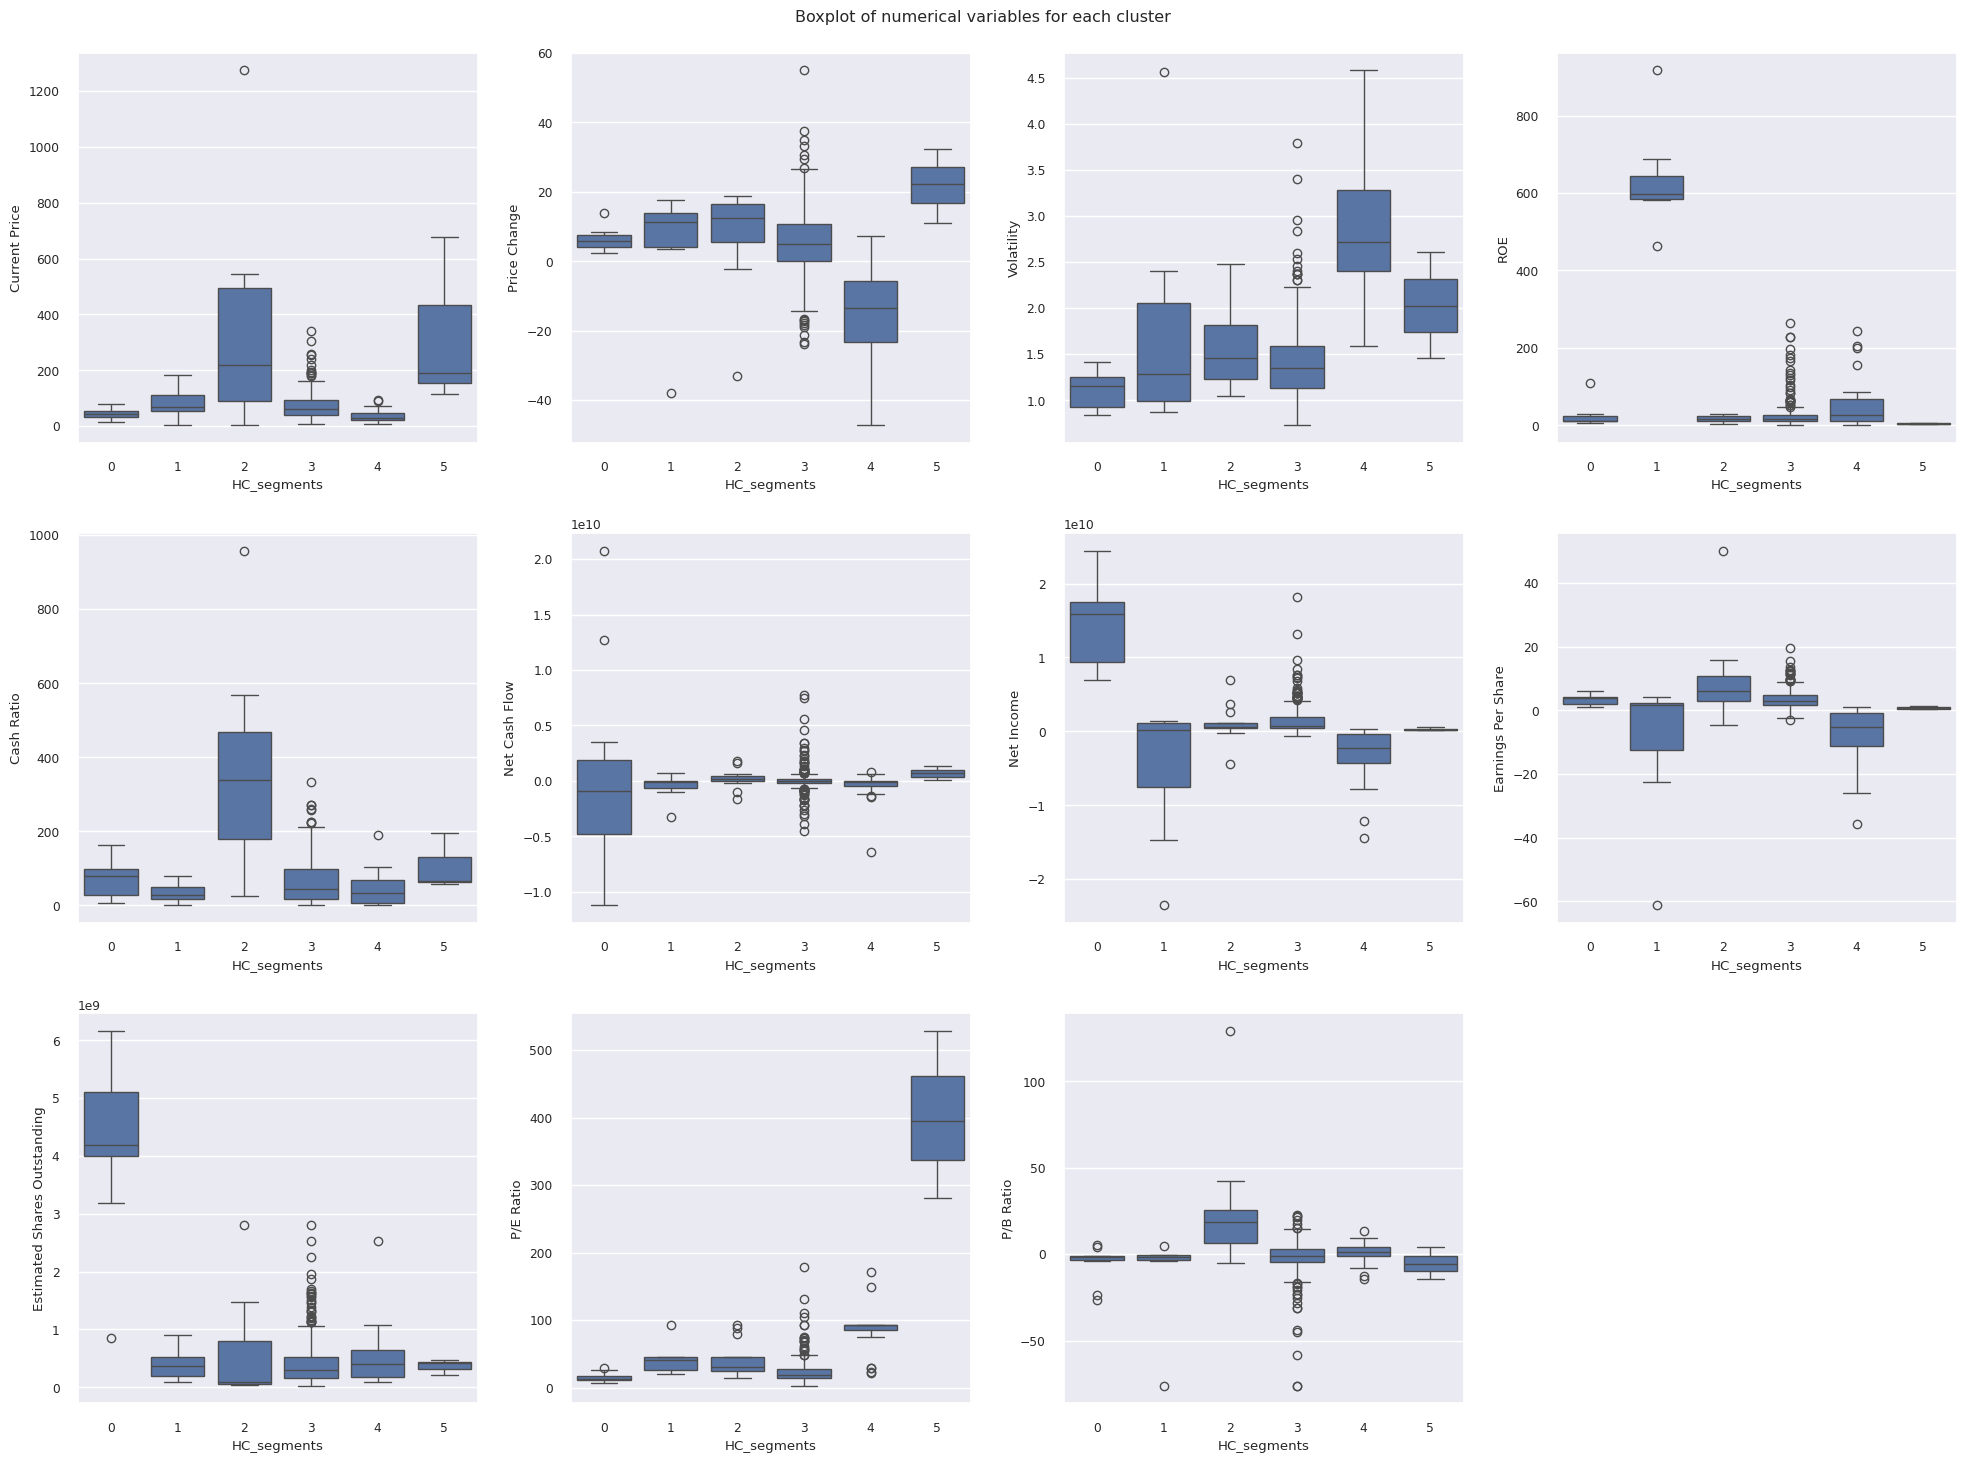

In [ ]:
plt.figure(figsize=(20, 15))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

Analyzing the cluster features based on the `HC_segments` column involves looking at the mean values of the financial metrics provided for each cluster. Here is a detailed analysis of each Hierarchical Clustering (HC) segment:

- **Cluster 0 (Diverse Financial Focus)**
  - Moderate average price; highest Price Change and Volatility.
  - Dominated by Financials and Telecommunications.
  - Indicates a variety of companies with significant recent growth or recovery.

- **Cluster 1 (Negative Anomalies)**
  - Reasonable average price but with negative Price Change.
  - Large negative Net Income; lowest in Cash Ratio.
  - Includes Consumer Staples and Energy; may represent undervalued or distressed stocks.

- **Cluster 2 (Stable, High-Liquidity Sector)**
  - High Current Price with substantial Price Change.
  - Exceptionally high Cash Ratio; solid Net Income and ROE.
  - Led by Health Care and Information Technology; suggests well-established, financially robust companies.

- **Cluster 3 (Largest, Industrially Diverse)**
  - Largest cluster with varied sectors; lower Current Price.
  - ROE and Cash Ratio are moderate, indicating consistent performance.
  - Primarily Industrials and Financials, reflecting traditional market stability.

- **Cluster 4 (Energy Dominated, High Risk)**
  - Lowest Current Price and substantial negative Price Change.
  - Extremely negative Net Income; highest P/E Ratio.
  - Energy sector concentration, signifying potentially high-risk investment opportunities.

- **Cluster 5 (High Value, High Growth Expectations)**
  - Highest Current Price and Price Change.
  - Small cluster size; extremely high P/E Ratio and lowest ROE.
  - Suggests exclusive, potentially overvalued stocks with high growth expectations.

**Concluding Remarks:**
These clusters exhibit a broad spectrum from highly liquid, stable stocks (Cluster 2) to high-risk, volatile sectors (Cluster 4). The largest cluster (Cluster 3) reflects a cross-section of the market's backbone industries, while the smallest (Cluster 5) represents outlier companies with exceptional stock metrics.

In [ ]:
end_time = time.time()  # End the timer
hierarchical_execution_time = end_time - start_time
print(f"Hierarchical clustering took {hierarchical_execution_time} seconds.")

Hierarchical clustering took 36.891804695129395 seconds.


## K-means vs Hierarchical Clustering

You compare several things, like:

**Which clustering technique took less time for execution?**
* K-Means took around 16 seconds to execute as compared to Hierarchical Clustering’s 33 seconds.
* Hierarchical clustering was slower primarily due to its complex dendrogram creation.

**Which clustering technique gave you more distinct clusters, or are they the same?**
* K-Means and Hierarchical Clustering both suggested 6 segments.
* K-Means, guided by silhouette and elbow methods, provided more distinct clusters.
* Hierarchical clustering’s distinctness depends on the linkage method and may vary.

**How many observations are there in the similar clusters of both algorithms?**
* Both gave similar clustering split, with one very large cluster.
* The largest cluster also shows uncanny similarities for Current Price, Price Change as well economic sector distribution.
* This consistency also supports the reliability of clustering outcome.

**How many clusters are obtained as the appropriate number of clusters from both algorithms?**
* Both algorithms determined 6 as the appropriate number of clusters, as indicated by various metrics including the silhouette score and dendrogram analysis.

**Differences and Similarities in Cluster Profiles:**

* **Similarities:**
 * Both K-Means and HC predominantly identify clusters in sectors like Industrials, Financials, Health Care, and Energy.
 * Each method highlights outliers with unique financial traits, crucial for strategic investment decisions.

* **Differences:**
 * K-Means tends to produce clusters of uniform sizes due to its centroid-based approach, unlike HC.
 * HC offers a more detailed view of data structuring, useful for deciphering complex market dynamics.

**Conclusion:**
Both clustering methods bring valuable insights to the dataset, with K-Means excelling in efficiency and distinct cluster formation, and HC providing depth in data structure understanding.

## Actionable Insights and Recommendations
As Trade&Ahead's appointed data scientists, we've derived key insights and tailored recommendations from our clustering analysis to enhance the company's investment strategies, ensuring precise market positioning and optimized financial outcomes.

### Actionable Insights

**Segment Identification:**
* Focus investment strategies on clusters dominated by impactful sectors such as Industrials, Financials, Health Care, and Energy to capitalize on their market influence.

**Outlier Utilization:**
* Analyze clusters containing extreme outliers or companies with unique financial characteristics to uncover high-reward investment opportunities.

**Risk Management:**
* Utilize the uniformity in financial behaviors observed in K-Means clusters to predict and manage investment risks more effectively.

**Market Dynamics:**
* Leverage the detailed data structuring from Hierarchical clustering to gain insights into complex market dynamics and inter-sector relationships, crucial for strategic decision-making.

**Risk Characterization and Management:**
* Identify similar risk profiles among stocks through clustering, aiding in the creation of diversified portfolios that balance risk across different sectors.

**Dynamic Portfolio Diversification:**
* Employ low correlation clusters for stable investments and high correlation clusters for potentially higher returns, enhancing portfolio diversification dynamically.

**Trend Identification and Adaptation:**
* Detect and adapt to trends within sectors using cluster analysis to strategically modify client portfolios in response to natural market fluctuations and predictions.


### Recommendations

**Cluster-Specific Strategies:**
* Tailor investment strategies to the distinct characteristics of each cluster, focusing on sectors or companies predicted to outperform based on the clustering analysis.

**Further Analysis on Outliers:**
* Conduct in-depth financial analyses on outlier companies to assess whether their market positions are due to disruptions, innovations, or anomalies that might introduce risks or opportunities.

**Dynamic Cluster Review:**
* Continuously update and review the clustering models to reflect the latest market data and trends, ensuring the investment strategies remain aligned with current market conditions.

**Leverage Hierarchical Insights:**
* Use insights from hierarchical clustering to formulate a multi-layered investment approach that adjusts dynamically based on evolving market conditions and cluster data.

**Educate Stakeholders:**
* Enhance stakeholder engagement through visualizations and comprehensive reports that outline the strategic value of clustering-based investment decisions.

**Technological Investment:**
* Invest in advanced analytics to refine clustering techniques continually, incorporating real-time data and predictive analytics to anticipate future market movements effectively.

___